In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from logging import *
basicConfig(filename="my_log" , level= DEBUG , filemode='w',format = '%(asctime)s - %(levelname)s - %(message)s')
logger = getLogger("SUHANA")
logger.debug("This is debug")
logger.info("This is information")
logger.warning("This is warning")


In [3]:
# First step analysis of Train Data
logger.info("User loading data")
train_data = pd.read_csv('C:\\Users\\RAJ\\OneDrive\\Desktop\\Project_6_TS\\Data\\rossmann-store-sales (2)\\train.csv',
                         dtype={'StateHoliday': str})

print(train_data.head(5))
print(train_data.info())
print(train_data.isnull().sum())
print(train_data.shape)
print(train_data.columns)
print(train_data.dtypes)
print(train_data.duplicated().sum())

   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 n

In [4]:
#First step ananysis of Store Data
logger.info('Loading the store data ')
store_data = pd.read_csv('C:\\Users\\RAJ\\OneDrive\\Desktop\\Project_6_TS\\Data\\rossmann-store-sales (2)\\store.csv')
print(store_data.head(5))
print(store_data.shape)
print(store_data.info())
print(store_data.columns)
print(store_data.dtypes)
print(store_data.isnull().sum())
print(store_data.duplicated().sum())

for col in store_data:
    if store_data[col].dtype == 'object' :
        store_data[col] = store_data[col].fillna(store_data[col].mode()[0])
    else:
        store_data[col] = store_data[col].fillna(store_data[col].min())
        
print(store_data.isnull().sum())
logger.info("Preprocessing_Done")

   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,

In [5]:
# MERGING STORE DATA WITH TRAIN DATA 
logger.info("Merging the data")
merged_data = train_data.merge(store_data , on = 'Store' , how ='inner')
print(merged_data.shape)
print(merged_data.head())
print(merged_data.isnull().sum())
print(merged_data.dtypes)

# DROPPING CompetitionDistance null values
merged_data.dropna(subset=['CompetitionDistance'],inplace= True)

# Replace null values in CompetitionOpenSinceMonth and Year with the mode
merged_data['CompetitionOpenSinceMonth'].fillna(merged_data['CompetitionOpenSinceMonth'].mode()[0],inplace=True)
merged_data['CompetitionOpenSinceYear'].fillna(merged_data['CompetitionOpenSinceYear'].mode()[0],inplace=True)

# For Promo2 related columns, create a new category for nulls
merged_data['PromoInterval'].fillna('Not Applicable', inplace=True)
merged_data['Promo2SinceWeek'].fillna(0, inplace=True)
merged_data['Promo2SinceYear'].fillna(0, inplace=True)
print(merged_data.isnull().sum())

(1017209, 18)
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      1          4  2015-07-30   5020        546     1      1            0   
2      1          3  2015-07-29   4782        523     1      1            0   
3      1          2  2015-07-28   5011        560     1      1            0   
4      1          1  2015-07-27   6102        612     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         c          a               1270.0   
2              1         c          a               1270.0   
3              1         c          a               1270.0   
4              1         c          a               1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1     

In [6]:
# Converting Date column Object type to Date format
merged_data['Date'] = pd.to_datetime(merged_data['Date'], format='%Y-%m-%d')

In [7]:
# Checking datatypes
merged_data.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
dtype: object

In [8]:
# Converting object columns to categorical
merged_data['StateHoliday'] = merged_data['StateHoliday'].astype('category')
merged_data['StoreType'] = merged_data['StoreType'].astype('category')
merged_data['Assortment'] = merged_data['Assortment'].astype('category')
merged_data['PromoInterval'] = merged_data['PromoInterval'].astype('category')
logger.info('Cleaning Done for Merged Data of Train and Store dataset')

Preprocessing is done for Train and Store data

In [9]:
# First step ananysis of Test Data
logger.info("User loading Test data")
test_data = pd.read_csv('C:\\Users\\RAJ\\OneDrive\\Desktop\\Project_6_TS\\Data\\rossmann-store-sales (2)\\test.csv',
                         dtype={'StateHoliday': str})

print(test_data.head(5))
print(test_data.info())
print(test_data.isnull().sum())
print(test_data.shape)
print(test_data.columns)
print(test_data.dtypes)
print(test_data.duplicated().sum())

   Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1            0              0
1   2      3          4  2015-09-17   1.0      1            0              0
2   3      7          4  2015-09-17   1.0      1            0              0
3   4      8          4  2015-09-17   1.0      1            0              0
4   5      9          4  2015-09-17   1.0      1            0              0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null

In [10]:
# Open columns has 11 null values (Float)
test_data['Open'] = test_data['Open'].fillna(1.0)
print(test_data['Open'].value_counts())

Open
1.0    35104
0.0     5984
Name: count, dtype: int64


In [11]:
# MERGING STORE DATA WITH TEST DATA 
logger.info("Merging the Test data with Store data")
testing_data  = test_data.merge(store_data , on = 'Store' , how ='inner')
print(testing_data.shape)
print(testing_data.head())
print(testing_data.isnull().sum())
print(testing_data.dtypes)

(41088, 17)
     Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  \
0     1      1          4  2015-09-17   1.0      1            0   
1   857      1          3  2015-09-16   1.0      1            0   
2  1713      1          2  2015-09-15   1.0      1            0   
3  2569      1          1  2015-09-14   1.0      1            0   
4  3425      1          7  2015-09-13   0.0      0            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              0         c          a               1270.0   
1              0         c          a               1270.0   
2              0         c          a               1270.0   
3              0         c          a               1270.0   
4              0         c          a               1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                        9.0                    2008.0       0   
2             

In [12]:
# Converting Date column Object type to Date format
testing_data['Date'] = pd.to_datetime(merged_data['Date'], format='%Y-%m-%d')

# Converting object columns to categorical
testing_data['StateHoliday'] = testing_data['StateHoliday'].astype('category')
testing_data['StoreType'] = testing_data['StoreType'].astype('category')
testing_data['Assortment'] = testing_data['Assortment'].astype('category')
testing_data['PromoInterval'] = testing_data['PromoInterval'].astype('category')
logger.info('Cleaning Done for Merged Data of Test and Store dataset')

Preprocessing is done for Test and Store data

**Task 1 - Exploration of customer purchasing behaviour**

1.a--> Check for distribution in both training and test sets - are the promotions
        distributed similarly between these two groups?

In [13]:
# Count promotion
logger.info("Promotion distribution checking between train and test data")
train_promo_count = train_data['Promo'].value_counts()
test_promo_count = test_data['Promo'].value_counts()
print(train_promo_count)
print(test_promo_count)
# Count promotions in proportion
train_promo_count_proportion = train_data['Promo'].value_counts(normalize=True)  # Normalizing( proportion of each promotion value instead of absolute counts.)
test_promo_count_proportion = test_data['Promo'].value_counts(normalize=True)
print(train_promo_count_proportion)
print(test_promo_count_proportion)

Promo
0    629129
1    388080
Name: count, dtype: int64
Promo
0    24824
1    16264
Name: count, dtype: int64
Promo
0    0.618485
1    0.381515
Name: proportion, dtype: float64
Promo
0    0.604167
1    0.395833
Name: proportion, dtype: float64


<Figure size 800x600 with 0 Axes>

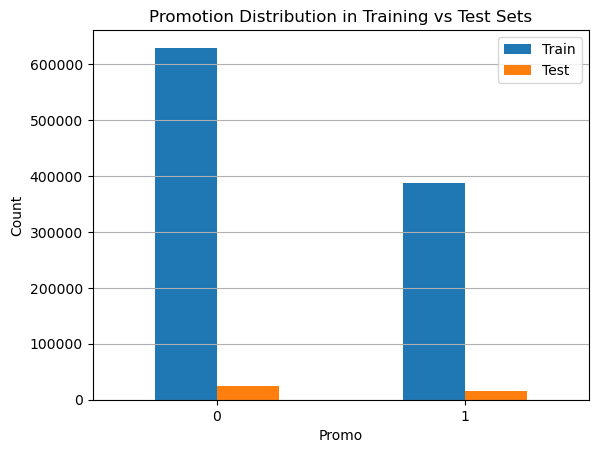

<Figure size 800x600 with 0 Axes>

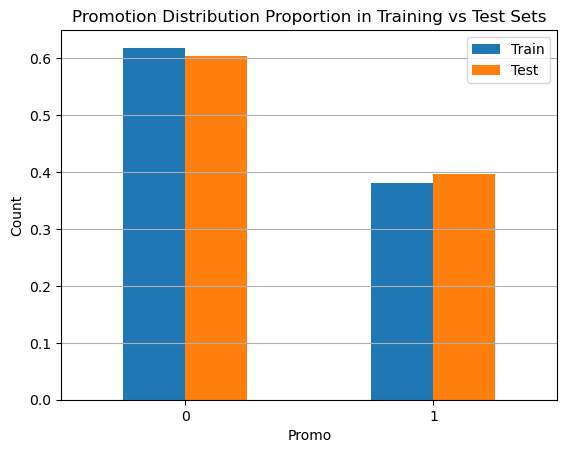

In [14]:
# Combine counts into a DataFrame
promo_counts = pd.DataFrame({
    'Train': train_promo_count,
    'Test': test_promo_count
})
# Plotting
plt.figure(figsize=(8,6))
promo_counts.plot(kind='bar')
plt.title('Promotion Distribution in Training vs Test Sets')
plt.xlabel('Promo')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis = 'y')
plt.show()

# Combine counts proportion into a DataFrame
promo_counts_proportion = pd.DataFrame({
    'Train': train_promo_count_proportion,
    'Test':test_promo_count_proportion
})

#Plotting
plt.figure(figsize=(8,6))
promo_counts_proportion.plot(kind='bar')
plt.title('Promotion Distribution Proportion in Training vs Test Sets')
plt.xlabel('Promo')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis = 'y')
plt.show()

logger.info("Task 1.a completed")


**Training Data Distribution**
Promo 0 (No Promotion): 61.85%
Promo 1 (Promotion): 38.15%
This means that in the training dataset, approximately 61.85% of the observations do not have a promotion, while about 38.15% do.

**Testing Data Distribution**
Promo 0 (No Promotion): 60.42%
Promo 1 (Promotion): 39.58%
In the testing dataset, around 60.42% of the observations do not have a promotion, and about 39.58% have one.

**Comparison and Interpretation**
Similar Overall Trends:
Both datasets have a similar overall distribution, with a majority of observations falling under Promo 0 (no promotion) and a minority under Promo 1 (promotion).
The proportions for Promo 1 in the training set (38.15%) and testing set (39.58%) are quite close, suggesting that promotions are distributed similarly across the two datasets.

1.b--> Check & compare sales behavior before, during and after holidays

SchoolHoliday
0    835488
1    181721
Name: count, dtype: int64
StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: count, dtype: int64


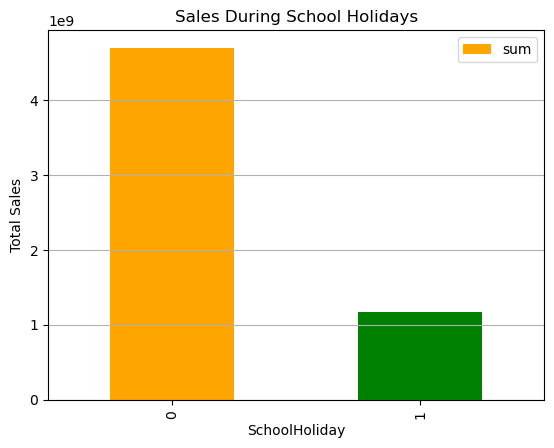

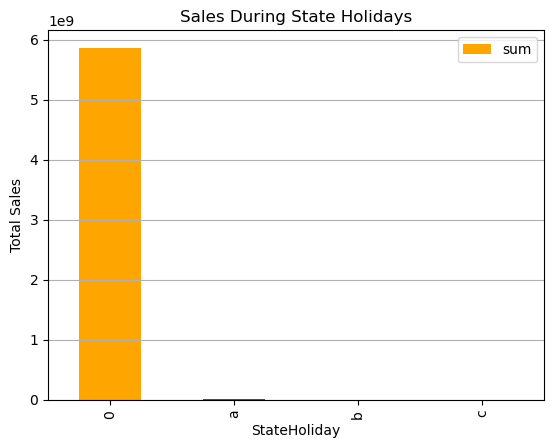

In [15]:
logger.info("Effect of Sales during Holiday analysis ")
print(merged_data['SchoolHoliday'].value_counts())
print(merged_data['StateHoliday'].value_counts())

# Count sales based on SchoolHoliday and StateHoliday
school_holiday_sales = merged_data.groupby('SchoolHoliday')['Sales'].agg(['sum', 'mean']).reset_index()
state_holiday_sales = merged_data.groupby('StateHoliday')['Sales'].agg(['sum', 'mean']).reset_index()

# Visualization for School Holidays
school_holiday_sales.plot(x='SchoolHoliday', y='sum', kind='bar', title='Sales During School Holidays',color=['orange', 'green'])
plt.ylabel('Total Sales')
plt.grid(axis='y')
plt.show()

# Visualization for State Holidays
state_holiday_sales.plot(x='StateHoliday', y='sum', kind='bar', title='Sales During State Holidays',color=['orange', 'green'])
plt.ylabel('Total Sales')
plt.grid(axis='y')
plt.show()

  StateHoliday_Period        Sales
0               After  7048.492879
1              Before  5937.718599
2              During  1600.763625


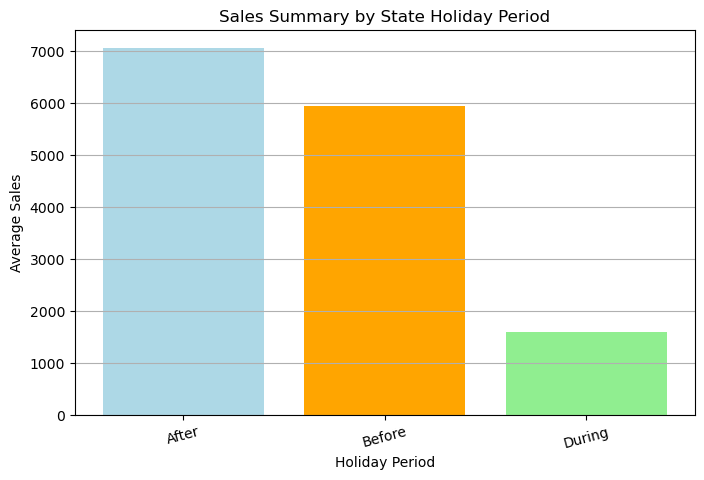

In [16]:
logger.info("Sales Behaviour During , After , Before State Holiday")

# Get unique holiday dates where StateHoliday is not '0'
holiday_dates = merged_data[merged_data['StateHoliday'] != '0']['Date'].unique()

# Create periods mapping
holiday_periods = {}
for holiday in holiday_dates:
    holiday_periods[holiday - pd.DateOffset(days=1)] = 'Before'
    holiday_periods[holiday] = 'During'
    holiday_periods[holiday + pd.DateOffset(days=1)] = 'After'

# Create a new column for holiday periods
merged_data['StateHoliday_Period'] = merged_data['Date'].map(holiday_periods).fillna('Neither')

# Filter only relevant rows for holiday periods
holiday_sales = merged_data[merged_data['StateHoliday_Period'] != 'Neither']

# Aggregate sales data by period, using mean or sum as needed
sales_summary = holiday_sales.groupby('StateHoliday_Period')['Sales'].mean().reset_index()

# Sales Summary output
print(sales_summary)

# Visualization
plt.figure(figsize=(8, 5))
plt.bar(sales_summary['StateHoliday_Period'], sales_summary['Sales'], color=['lightblue', 'orange', 'lightgreen'])
plt.xlabel('Holiday Period')
plt.ylabel('Average Sales')
plt.title('Sales Summary by State Holiday Period')
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.show()


**Sales Before Holidays:**
Average Sales: 5937.72
This indicates that sales tend to be relatively high as consumers prepare for upcoming holidays, likely purchasing gifts or stockpiling for festivities.

**Sales During Holidays:**
Average Sales: 1600.76
Sales drop significantly during the holidays. This could be due to several factors, such as:
Many stores being closed on public holidays.
Shoppers potentially prioritizing spending on experiences or family activities over shopping.
Reduced foot traffic as people take time off from their usual shopping routines

**Sales After Holidays:**
Average Sales: 7048.49
Stores often have discounts to sell leftover holiday items, which attracts buyers looking for good deals.
People may need to buy things they used up during the holidays, like food or gifts.

  SchoolHoliday_Period        Sales
0                After  6142.314823
1               Before  1657.240054
2               During  7511.896914


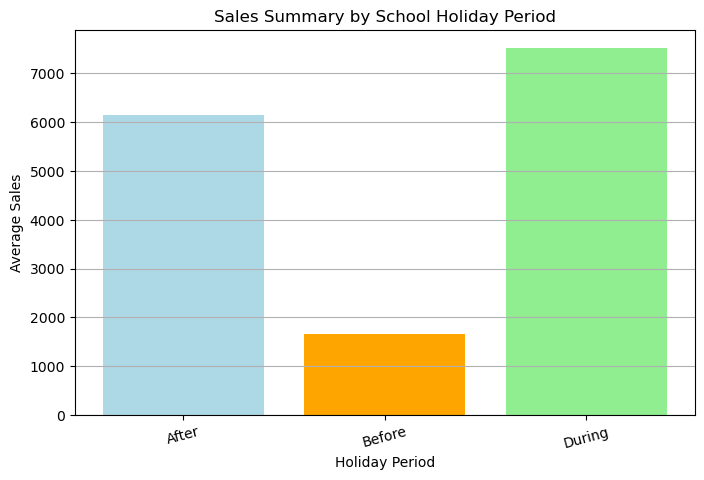

In [17]:
logger.info("Sales Behaviour During , After , Before School Holiday")

# Get unique holiday dates where StateHoliday is not '0'
holiday_dates = merged_data[merged_data['SchoolHoliday'] != 0]['Date'].unique()

# Create periods mapping
holiday_periods = {}
for holiday in holiday_dates:
    holiday_periods[holiday - pd.DateOffset(days=1)] = 'Before'
    holiday_periods[holiday] = 'During'
    holiday_periods[holiday + pd.DateOffset(days=1)] = 'After'

# Create a new column for holiday periods
merged_data['SchoolHoliday_Period'] = merged_data['Date'].map(holiday_periods).fillna('Neither')

# Filter only relevant rows for holiday periods
holiday_sales = merged_data[merged_data['SchoolHoliday_Period'] != 'Neither']

# Aggregate sales data by period, using mean or sum as needed
sales_summary = holiday_sales.groupby('SchoolHoliday_Period')['Sales'].mean().reset_index()

# Sales Summary output
print(sales_summary)

# Visualization
plt.figure(figsize=(8, 5))
plt.bar(sales_summary['SchoolHoliday_Period'], sales_summary['Sales'], color=['lightblue', 'orange', 'lightgreen'])
plt.xlabel('Holiday Period')
plt.ylabel('Average Sales')
plt.title('Sales Summary by School Holiday Period')
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.show()

logger.info("Task 1.b Completed")

**Sales During School Holidays:**
Average Sales: 7511.90
Families may be more proactive about health and wellness, stocking up on medications or health products, likely due to increased activity and potential exposure to illnesses.

**Sales After School Holidays:**
Average Sales: 6142.31
Offer promotions on items that help with recovery or maintenance of health, such as first-aid supplies, flu medications, and cold remedies.

**Sales Before School Holidays:**
Average Sales: 1657.24
There may be a lack of urgency in purchasing, possibly due to parents feeling prepared or focused on other pre-holiday activities.

1.c--> Find out any seasonal (Christmas, Easter etc) purchase behaviours.

  StateHoliday        Sales    Holiday Type
0            0  5947.483893            None
1            a   290.735686  Public Holiday
2            b   214.311510          Easter
3            c   168.733171       Christmas


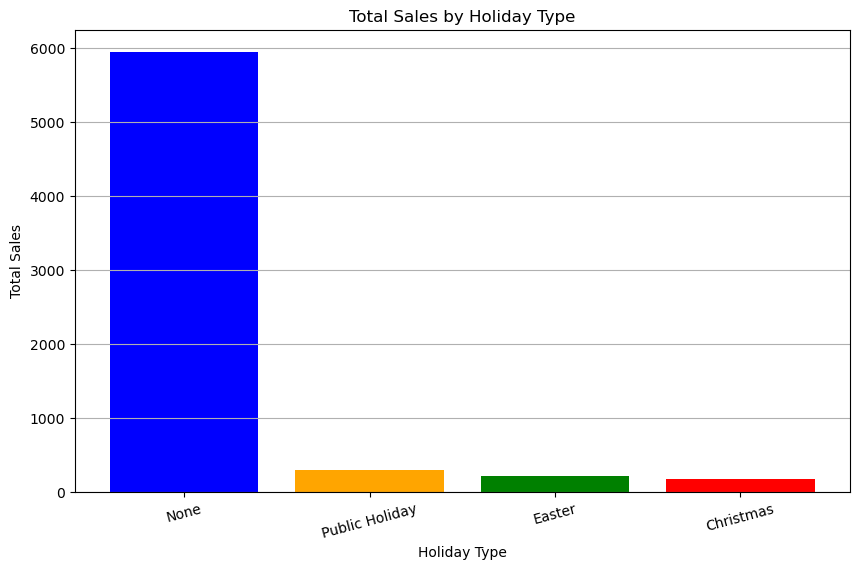

In [18]:
logger.info("Seasonal Trend")

# Group sales data by StateHoliday and aggregate
holiday_sales_summary = merged_data.groupby('StateHoliday')['Sales'].mean().reset_index()

# Mapping for better readability
holiday_mapping = {
    '0': 'None',
    'a': 'Public Holiday',
    'b': 'Easter',
    'c': 'Christmas'
}

# Sales Summary
holiday_sales_summary['Holiday Type'] = holiday_sales_summary['StateHoliday'].map(holiday_mapping)

# Print the sales summary
print(holiday_sales_summary)

# Visualization of sales by holiday type
plt.figure(figsize=(10, 6))
plt.bar(holiday_sales_summary['Holiday Type'], holiday_sales_summary['Sales'], color=['blue', 'orange', 'green', 'red'])
plt.title('Total Sales by Holiday Type')
plt.xlabel('Holiday Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.show()




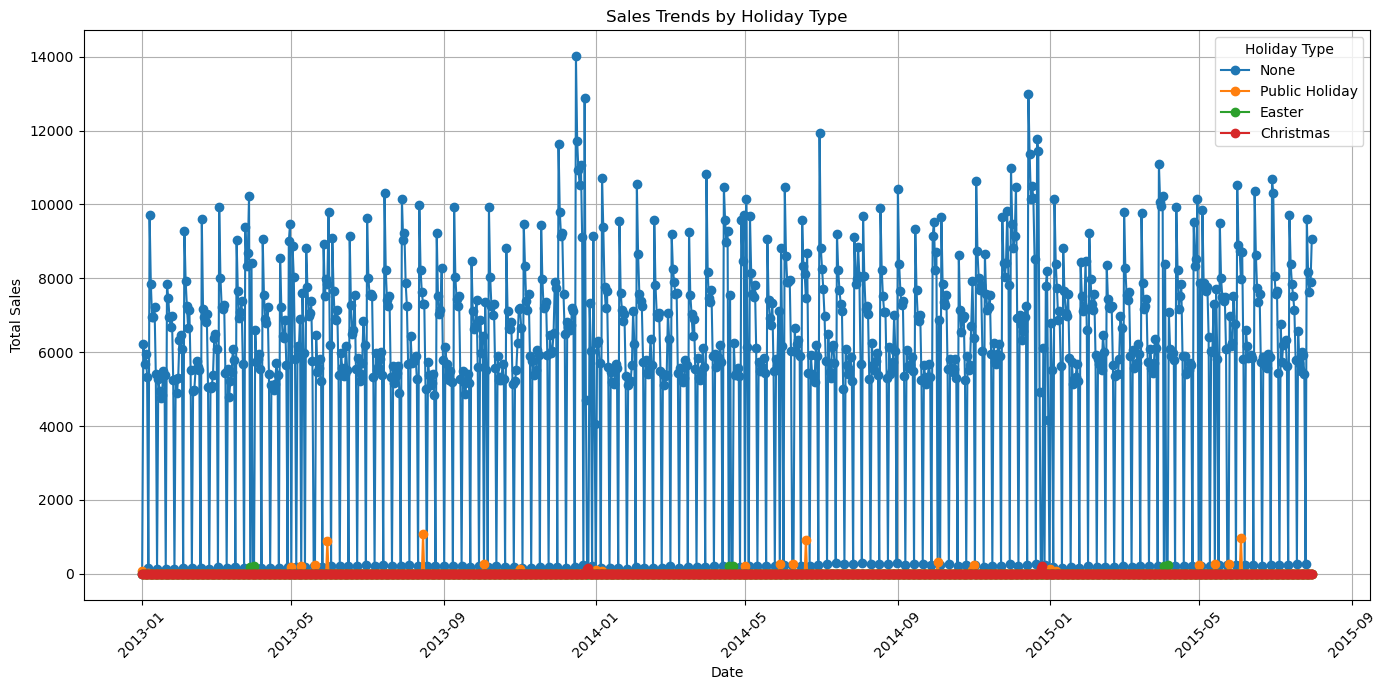

In [19]:
logger.info("Sales Trends by Holiday Type")

# Extract the year and holiday type for aggregation
merged_data['Year'] = merged_data['Date'].dt.year

# Group sales data by Date and StateHoliday and aggregate
daily_sales_summary = merged_data.groupby(['Date', 'StateHoliday'])['Sales'].mean().reset_index()

# Mapping for better readability
holiday_mapping = {
    '0': 'None',
    'a': 'Public Holiday',
    'b': 'Easter',
    'c': 'Christmas'
}
daily_sales_summary['Holiday Type'] = daily_sales_summary['StateHoliday'].map(holiday_mapping)

# Pivot table to prepare data for plotting
pivot_table = daily_sales_summary.pivot_table(index='Date', columns='Holiday Type', values='Sales', fill_value=0)

# Plotting the line graph
plt.figure(figsize=(14, 7))
for holiday in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[holiday], label=holiday, marker='o')

plt.title('Sales Trends by Holiday Type')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Holiday Type')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


    YearMonth StateHoliday        Sales    Holiday Type
0     2013-01            0  5432.093721            None
1     2013-01            a    75.326072  Public Holiday
2     2013-01            b          NaN          Easter
3     2013-01            c          NaN       Christmas
4     2013-02            0  5494.371397            None
..        ...          ...          ...             ...
119   2015-06            c          NaN       Christmas
120   2015-07            0  6142.705511            None
121   2015-07            a          NaN  Public Holiday
122   2015-07            b          NaN          Easter
123   2015-07            c          NaN       Christmas

[124 rows x 4 columns]


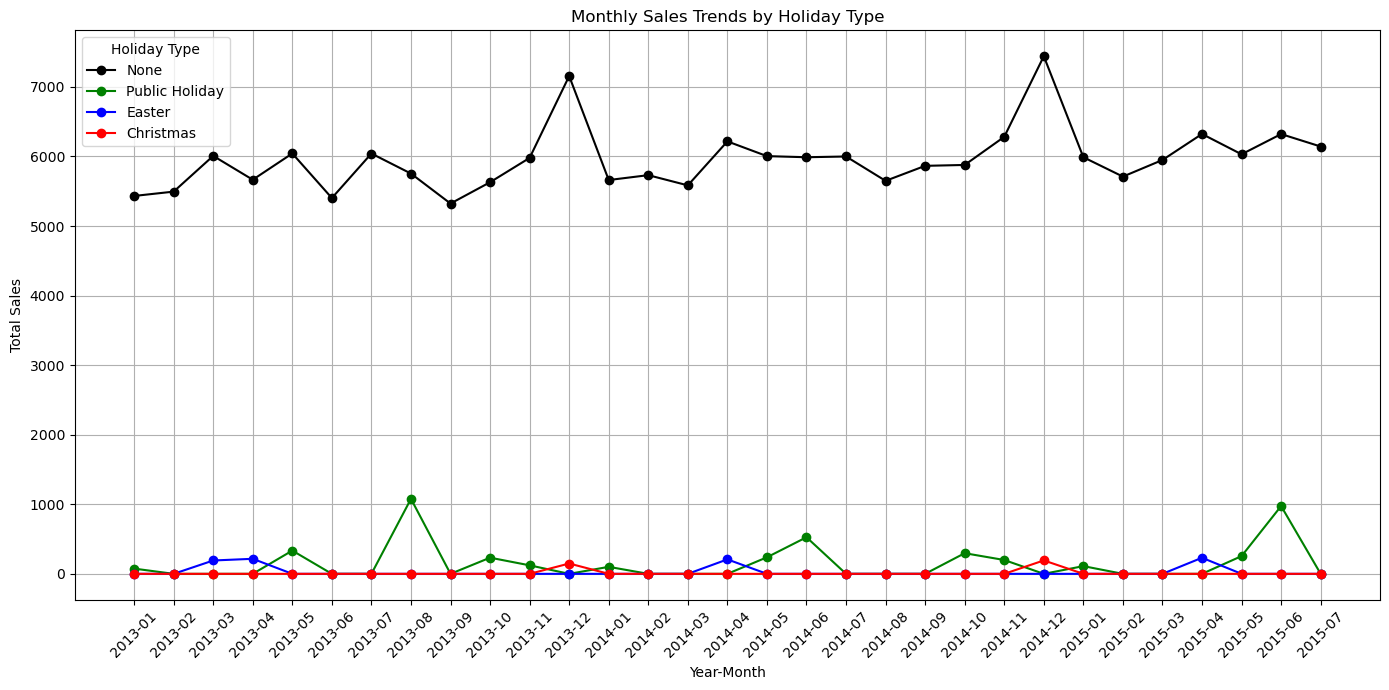

In [20]:
logger.info("Monthly Sales Trends by Holiday Type")

# Extract year and month for aggregation
merged_data['YearMonth'] = merged_data['Date'].dt.to_period('M')

# Group sales data by YearMonth and StateHoliday, summing the sales
monthly_sales_summary = merged_data.groupby(['YearMonth', 'StateHoliday'])['Sales'].mean().reset_index()

# Mapping for better readability
holiday_mapping = {
    '0': 'None',
    'a': 'Public Holiday',
    'b': 'Easter',
    'c': 'Christmas'
}
monthly_sales_summary['Holiday Type'] = monthly_sales_summary['StateHoliday'].map(holiday_mapping)

# Pivot table to prepare data for plotting
pivot_table_monthly = monthly_sales_summary.pivot_table(index='YearMonth', columns='Holiday Type', values='Sales', fill_value=0)

# Setting Colors
colors = {
    'None': 'Black',
    'Public Holiday': 'green',
    'Easter': 'blue',
    'Christmas': 'red'
}

# Plotting the line graph for monthly trends
plt.figure(figsize=(14, 7))
for holiday in pivot_table_monthly.columns:
    plt.plot(pivot_table_monthly.index.astype(str), pivot_table_monthly[holiday], label=holiday, marker='o' , color = colors[holiday])
    
# Display the data
print(monthly_sales_summary)

plt.title('Monthly Sales Trends by Holiday Type')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.legend(title='Holiday Type')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


Holiday Type         None  Public Holiday      Easter   Christmas
Year                                                             
2013          5824.885269      268.288627  204.034529  148.512108
2014          6005.604127      293.153706  207.781614  192.847059
2015          6067.023402      318.836334  231.118386    0.000000
    Year StateHoliday        Sales    Holiday Type
0   2013            0  5824.885269            None
1   2013            a   268.288627  Public Holiday
2   2013            b   204.034529          Easter
3   2013            c   148.512108       Christmas
4   2014            0  6005.604127            None
5   2014            a   293.153706  Public Holiday
6   2014            b   207.781614          Easter
7   2014            c   192.847059       Christmas
8   2015            0  6067.023402            None
9   2015            a   318.836334  Public Holiday
10  2015            b   231.118386          Easter
11  2015            c          NaN       Christmas


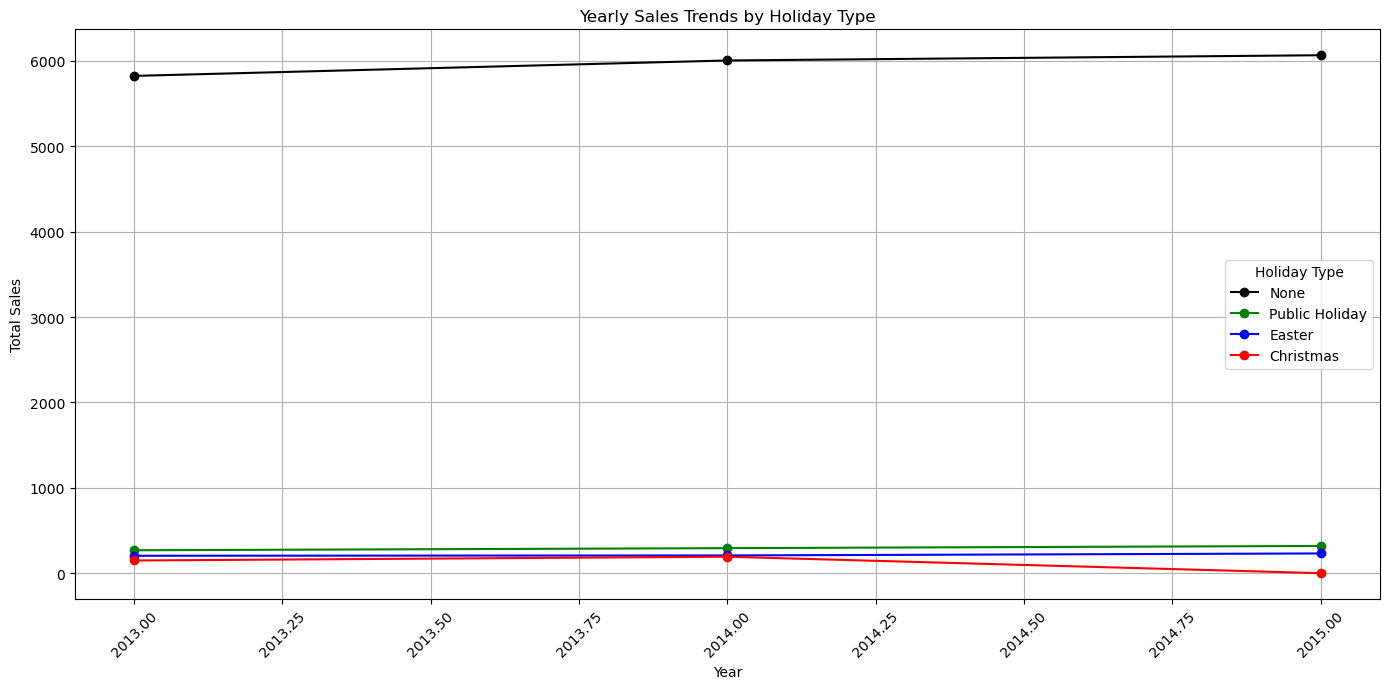

In [21]:
logger.info('Yearly Sales Trends by Holiday Type')

# Extract year for aggregation
merged_data['Year'] = merged_data['Date'].dt.year

# Group sales data by Year and StateHoliday, summing the sales
yearly_sales_summary = merged_data.groupby(['Year', 'StateHoliday'])['Sales'].mean().reset_index()

# Mapping for better readability
holiday_mapping = {
    '0': 'None',
    'a': 'Public Holiday',
    'b': 'Easter',
    'c': 'Christmas'
}

# Apply mapping
yearly_sales_summary['Holiday Type'] = yearly_sales_summary['StateHoliday'].map(holiday_mapping)

# Pivot table to prepare data for plotting
pivot_table_yearly = yearly_sales_summary.pivot_table(index='Year', columns='Holiday Type', values='Sales', fill_value=0)

# Print the pivot table to verify the structure
print(pivot_table_yearly)

# Setting Colors
colors = {
    'None': 'Black',
    'Public Holiday': 'green',
    'Easter': 'blue',
    'Christmas': 'red'
}

# Plotting the line graph for yearly trends
plt.figure(figsize=(14, 7))
for holiday in pivot_table_yearly.columns:
    plt.plot(pivot_table_yearly.index, pivot_table_yearly[holiday], label=holiday, marker='o' ,  color =colors[holiday])

# Display yearly sales data for reference
print(yearly_sales_summary)
plt.title('Yearly Sales Trends by Holiday Type')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Holiday Type')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

logger.info('Task 1.c Completed')

**Total Sales Overview**
The highest sales figure is recorded during the period with no holiday (StateHoliday = '0') at 5947.48. This indicates that sales may be more consistent during non-holiday periods.
Sales during holidays are significantly lower, with Public Holidays at 290.74, Easter at 214.31, and Christmas at 168.73. This suggests that holiday periods might not always correlate with higher sales, possibly due to store closures or consumer behavior changes.

**In Other Words**
We can say that holidays season are highly affect the Sales. During holiday, some days we encounter no sales

1.d--> What can you say about the correlation between sales and number of
customers?

In [22]:
logger.info('Analyse the correlation between  sales and customers')
sales_customers = merged_data[['Customers' , 'Sales']]
sales_customers

,Customers,Sales
0,555,5263
1,546,5020
2,523,4782
3,560,5011
4,612,6102
...,...,...
1017204,339,4771
1017205,326,4540
1017206,300,4297
1017207,305,3697


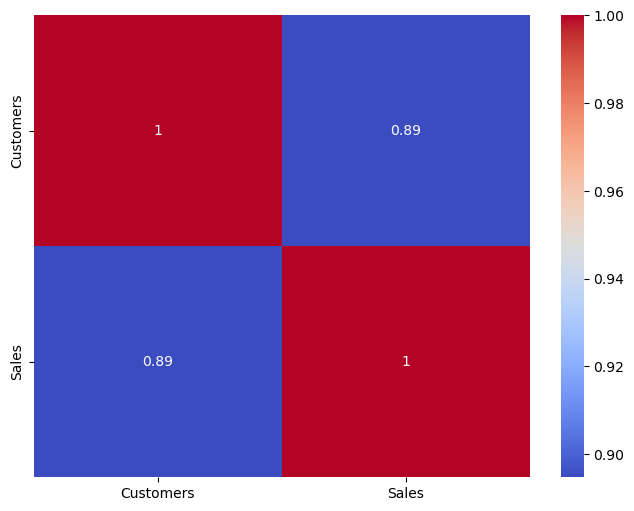

In [23]:
plt.figure(figsize=(8, 6))  # Set the size of the heatmap
sns.heatmap(sales_customers.corr(), annot=True, cmap='coolwarm')
plt.show()


In [24]:
sales_customers.corr()

,Customers,Sales
Customers,1.000000,0.894711
Sales,0.894711,1.000000


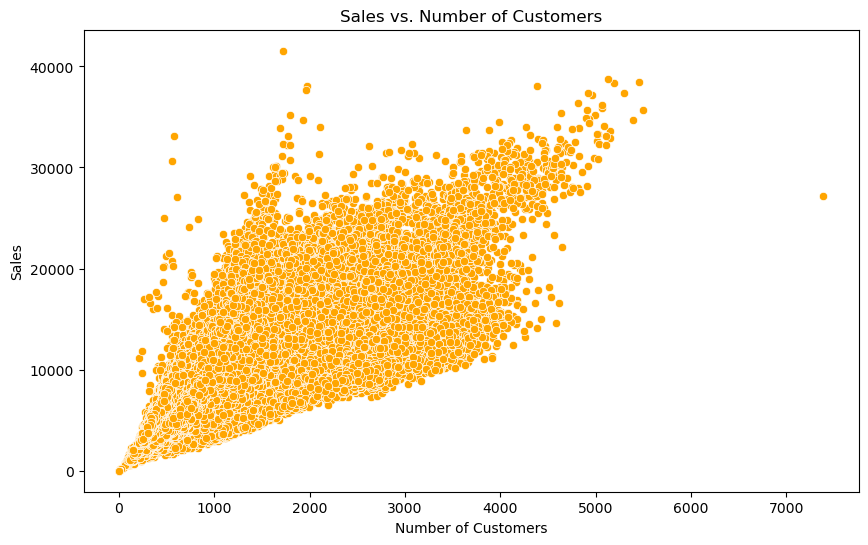

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Customers', y='Sales' , color = 'orange')
plt.title('Sales vs. Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()


**Positive Correlation**
The correlation coefficient of 0.8947 indicates a strong positive correlation between the number of customers and sales. This means that, generally, as the number of customers increases, sales also tend to increase significantly.

1.e--> How does promo affect sales? Are the promos attracting more customers? How
does it affect already existing customers?

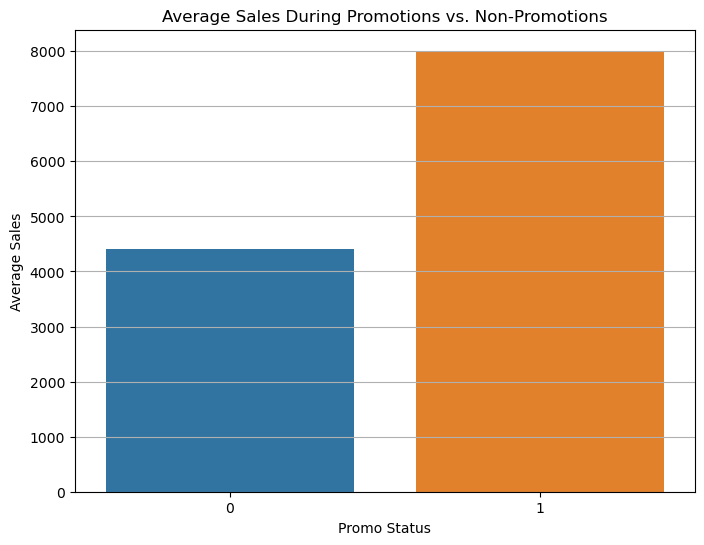

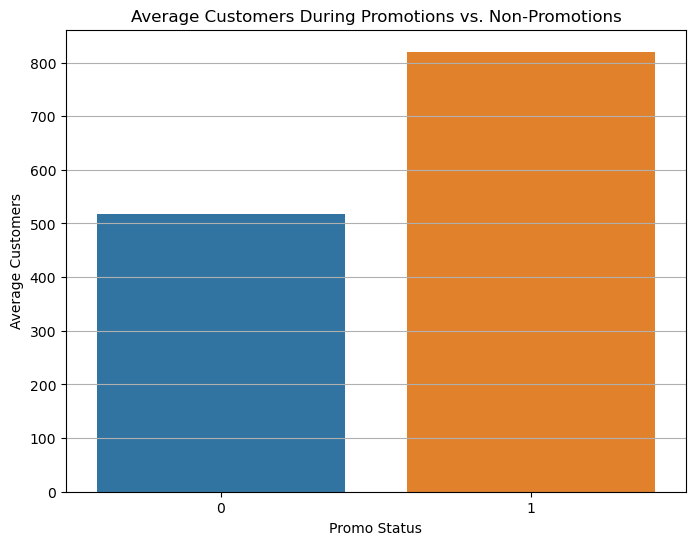

In [26]:
logger.info("Analysing the effect of Promo")

# Analyze sales during promotion
promo_sales = merged_data.groupby('Promo')['Sales'].mean()

# Analyze customers during promotion
promo_customers = merged_data.groupby('Promo')['Customers'].mean()

# Bar plot for Sales
plt.figure(figsize=(8, 6))
sns.barplot(x=promo_sales.index, y=promo_sales.values)
plt.title('Average Sales During Promotions vs. Non-Promotions')
plt.xlabel('Promo Status')
plt.ylabel('Average Sales')
plt.grid(axis= 'y')
plt.show()

# Bar plot for Customers
plt.figure(figsize=(8,6))
sns.barplot(x=promo_customers.index, y=promo_customers.values)
plt.title('Average Customers During Promotions vs. Non-Promotions')
plt.xlabel('Promo Status')
plt.ylabel('Average Customers')
plt.grid(axis ='y')
plt.show()


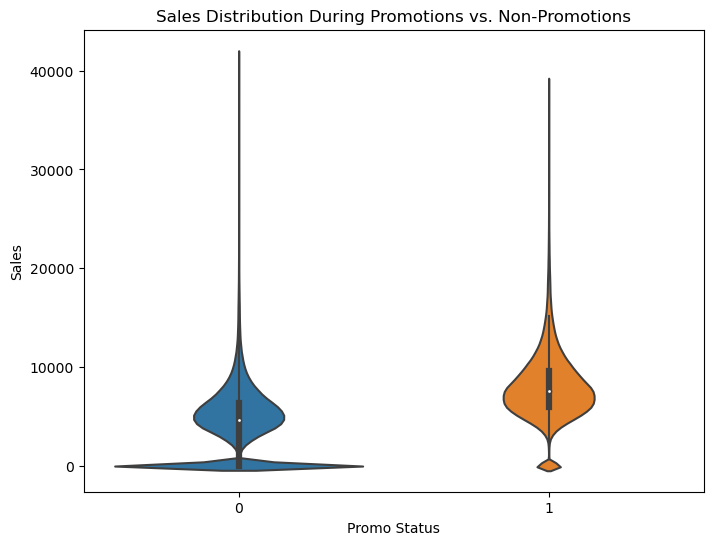

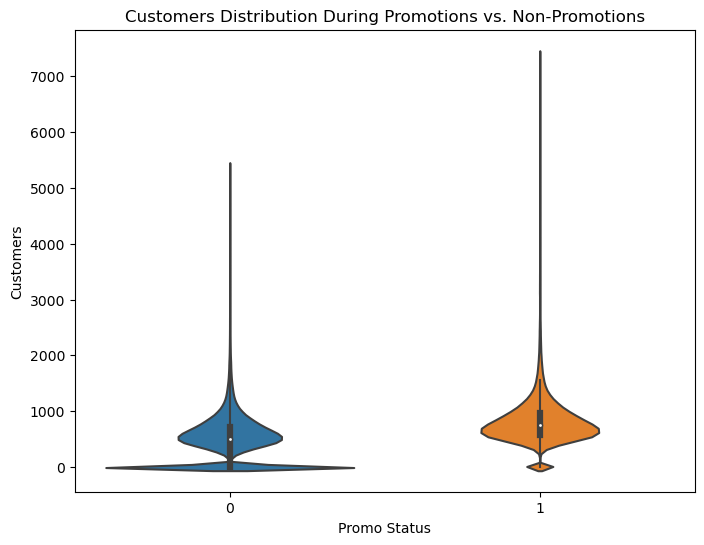

In [27]:
# Violin plot for Sales
plt.figure(figsize=(8,6))
sns.violinplot(data = merged_data , x = 'Promo' , y ='Sales')
plt.title('Sales Distribution During Promotions vs. Non-Promotions')
plt.xlabel('Promo Status')
plt.ylabel('Sales')
plt.show()

# Violin plot for Customers
plt.figure(figsize=(8,6))
sns.violinplot(data = merged_data , x = 'Promo' , y ='Customers')
plt.title('Customers Distribution During Promotions vs. Non-Promotions')
plt.xlabel('Promo Status')
plt.ylabel('Customers')
plt.show()

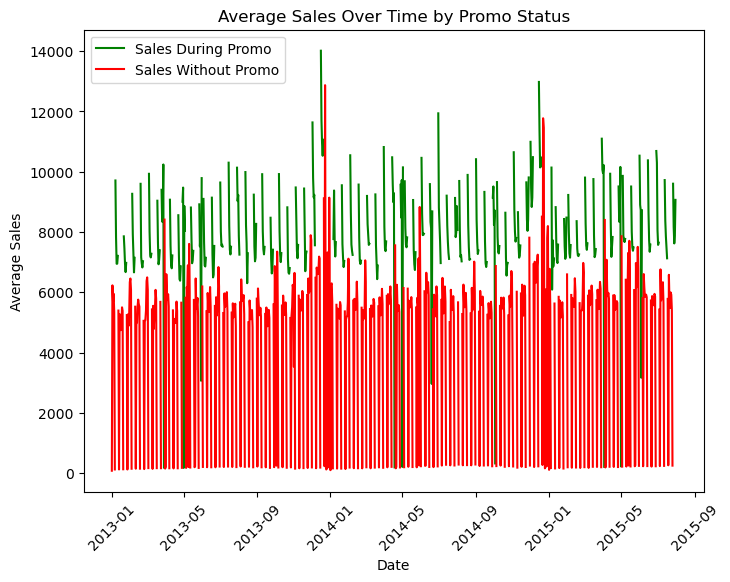

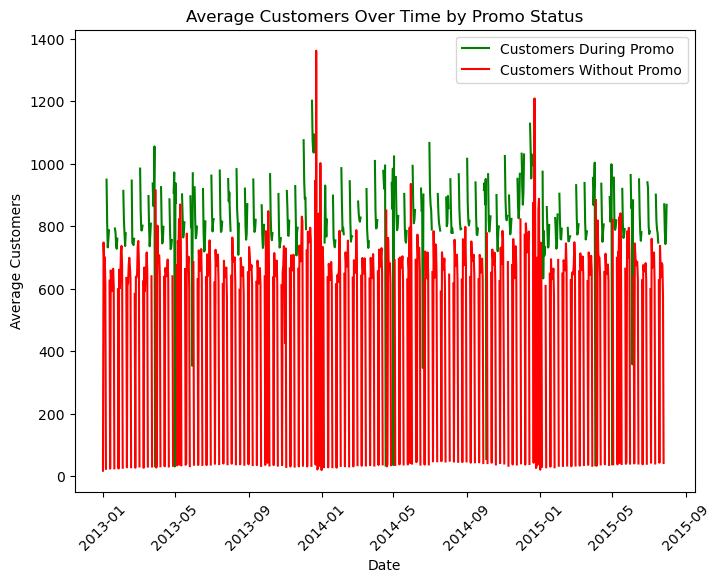

In [28]:
avg_sales = merged_data.groupby(['Date' , 'Promo'])['Sales'].mean().unstack()
avg_customers = merged_data.groupby(['Date' , 'Promo'])['Customers'].mean().unstack()

# Line plot for Sales
plt.figure(figsize=(8,6))
plt.plot(avg_sales.index , avg_sales[1] ,label='Sales During Promo', color='green')
plt.plot(avg_sales.index , avg_sales[0] ,label='Sales Without Promo', color='red')
plt.title('Average Sales Over Time by Promo Status')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Line plot for Customers
plt.figure(figsize=(8, 6))
plt.plot(avg_customers.index, avg_customers[1], label='Customers During Promo', color='green')
plt.plot(avg_customers.index, avg_customers[0], label='Customers Without Promo', color='red')
plt.title('Average Customers Over Time by Promo Status')
plt.xlabel('Date')
plt.ylabel('Average Customers')
plt.legend()
plt.xticks(rotation=45)
plt.show()


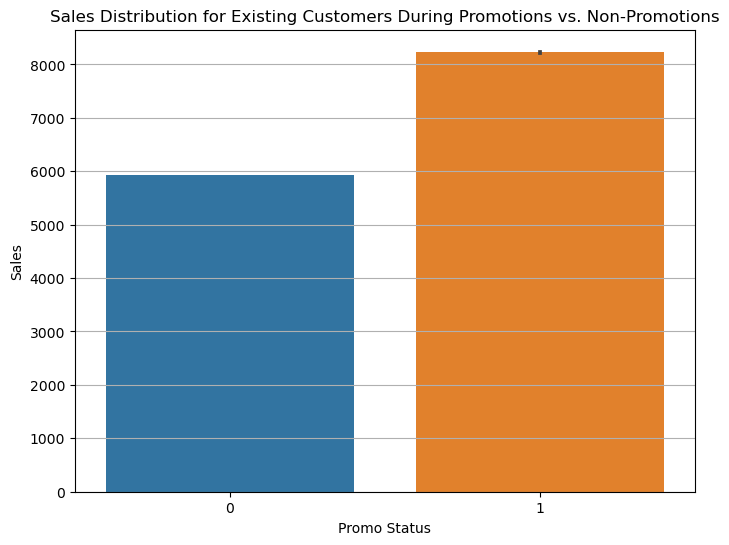

              mean  median
Promo                     
0      5929.826183  5459.0
1      8228.696063  7650.0


In [29]:
# Filter existing customers
existing_customers = merged_data[merged_data['Customers'] > 0]  
avg_sales_existing = existing_customers.groupby('Promo')['Sales'].mean()
avg_customers_existing = existing_customers.groupby('Promo')['Customers'].mean()

# Box plot for existing customers
plt.figure(figsize=(8, 6))
sns.barplot(x='Promo', y='Sales', data=existing_customers)
plt.title('Sales Distribution for Existing Customers During Promotions vs. Non-Promotions')
plt.xlabel('Promo Status')
plt.ylabel('Sales')
plt.grid(axis = 'y')
plt.show()

avg_sales_existing = existing_customers.groupby('Promo')['Sales'].agg(['mean', 'median'])
print(avg_sales_existing)


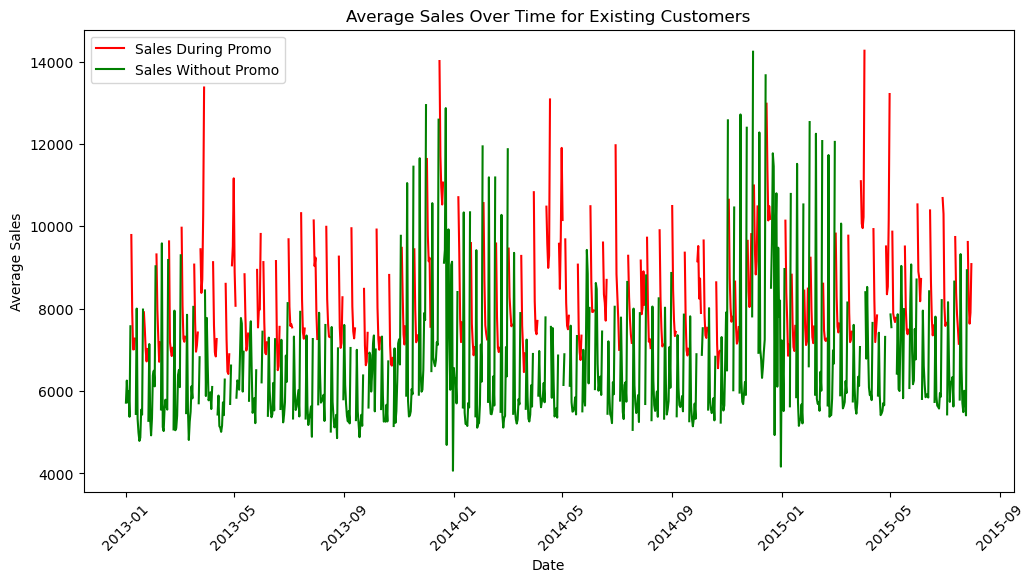

In [30]:
# Average sales for existing customers over time
avg_sales_time = existing_customers.groupby(['Date', 'Promo'])['Sales'].mean().unstack()

plt.figure(figsize=(12, 6))
plt.plot(avg_sales_time.index, avg_sales_time[1], label='Sales During Promo', color='red')
plt.plot(avg_sales_time.index, avg_sales_time[0], label='Sales Without Promo', color='green')
plt.title('Average Sales Over Time for Existing Customers')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.legend()
plt.xticks(rotation=45)
plt.show()

**How does promo affect sales**
**Sales Increase:** The average sales during promotional days (7991.15) are significantly higher than during non-promotional days (4406.05), suggesting that promotions are effective in driving higher sales.

**Customer Attraction:** The number of customers also increases when promotions are active (820.10) compared to non-promotional days (517.82). This indicates that promotions are successful in attracting more customers to the .

**Are the promos attracting more customers?**
The data indicates that promotions not only boost sales but also successfully attract a larger customer base.
Thus, we can say that promo attracting large number of customers.

**How does it affect already existing customers?**
There is a clear increase in average  sales when promotions are offered, indicating that promotions attract higher spending from existing customers.



1.f--> Could the promos be deployed in more effective ways? Which stores should
promos be deployed in?

In [31]:
logger.info("Analyses of which store type deployed Promo more efficient way and which required improvement")

# Calculating Promo Sales for StoreType
Promo_sales = merged_data[merged_data['Promo'] == 1].groupby('StoreType')['Sales'].mean()

#Calculating Non Promo Sales for StoreType
Non_promo_sales = merged_data[merged_data['Promo'] == 0].groupby('StoreType')['Sales'].mean()

sales_comparison = pd.DataFrame({    
    'Promo_sales' : Promo_sales,
    'Non_promo_sales' : Non_promo_sales
})
sales_comparison['Lift'] = sales_comparison['Promo_sales'] - sales_comparison['Non_promo_sales']
print(sales_comparison)

            Promo_sales  Non_promo_sales         Lift
StoreType                                            
a           8068.080939      4300.418175  3767.662764
b          11109.739497      9409.434791  1700.304706
c           7810.174738      4435.040156  3375.134582
d           7776.593414      4326.661817  3449.931597


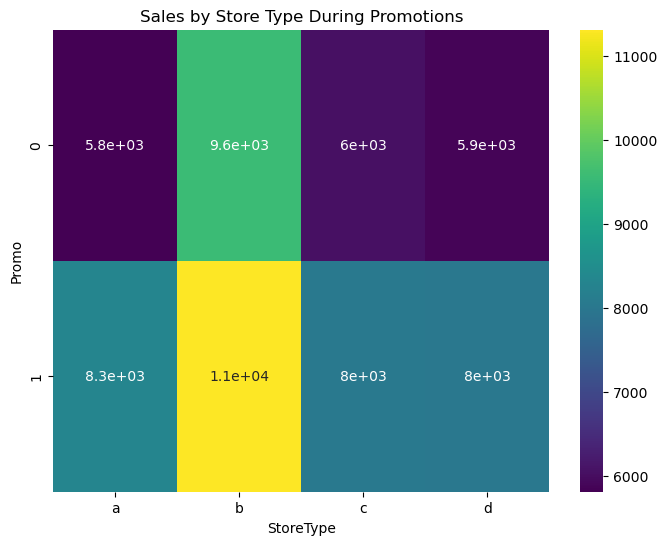

In [32]:
existing_customers = merged_data[merged_data['Customers'] > 0].groupby(['Promo', 'StoreType'])['Sales'].mean().unstack()


plt.figure(figsize=(8,6))
sns.heatmap(existing_customers, annot=True, cmap='viridis')
plt.title('Sales by Store Type During Promotions')
plt.show()

In [33]:
# Calculating sales average for StoreType which continue Promo
Promo2_sales = merged_data[merged_data['Promo2'] == 1].groupby('StoreType')['Sales'].mean()

# Calculating sales average for StoreType which  quit Promo
Non_promo2_sales = merged_data[merged_data['Promo2']==0].groupby('StoreType')['Sales'].mean()

sales_comparison_for_Promo2 = pd.DataFrame({
    'StoreType' :['a','b','c','d'],
    'Promo2_sales' : Promo2_sales,
    'Non_promo2_sales' : Non_promo2_sales
})

sales_comparison_for_Promo2['Lift'] = sales_comparison_for_Promo2['Promo2_sales'] - sales_comparison_for_Promo2['Non_promo2_sales']
print(sales_comparison_for_Promo2)

          StoreType  Promo2_sales  Non_promo2_sales         Lift
StoreType                                                       
a                 a   5465.960735       5977.170735  -511.210001
b                 b   7930.887097      10910.845718 -2979.958622
c                 c   5101.020335       6343.296783 -1242.276449
d                 d   5422.516660       5933.084871  -510.568211


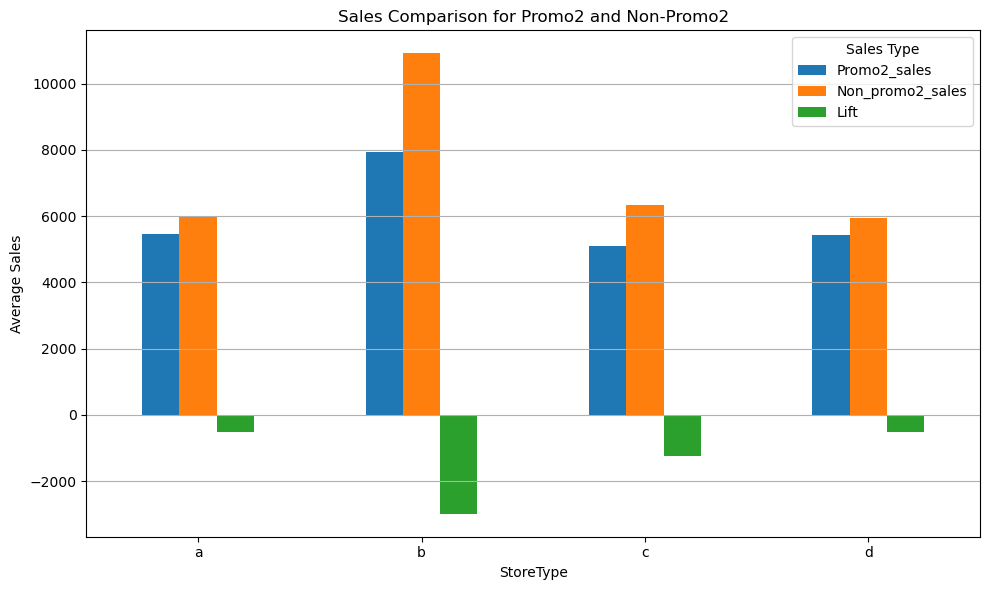

In [34]:
#Plotting
sales_comparison_for_Promo2.plot(kind='bar', figsize=(10, 6))
plt.title('Sales Comparison for Promo2 and Non-Promo2')
plt.xlabel('StoreType')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)  
plt.legend(title='Sales Type')
plt.tight_layout()
plt.grid(axis = 'y')
plt.show()


**Overall Performance during Promo**
All store types show a positive lift when promotions are applied, indicating that promotions effectively drive sales across the board.

Store Type A stands out as the most responsive to promotions.
While Store Type B has the highest promotional sales, the lift is significantly lower than Store Type A. This could imply that while the sales volume is high, the effectiveness of the promotion relative to non-promo periods is less impactful.
Similar to Store Type C, Store Type D also shows a significant lift, indicating effective promotional strategies.

**Overall Performance during Promo2**
All store types show a negative lift when comparing Promo2_sales to Non_promo2_sales. This indicates that stores participating in Promo2 are underperforming compared to their non-promotional sales periods

Store Type A experiences a slight decline in sales during Promo2, suggesting that the promotion may not be appealing or effective for this store type.
Store type B shows a significant drop in sales during Promo2. The large negative lift indicates that the promotion might be driving customers away or failing to attract enough business.
Similar to the others, Store Type D experiences a decline in sales

**Conclusion**
The data suggests that the current implementation of Promo2 is not effective across all store types. A comprehensive reevaluation of promotional strategies, coupled with customer engagement and market analysis, is essential to enhance the effectiveness of promotions and drive sales growth.

1.g--> Trends of customer behavior during store open and closing times.

   Status        Sales   Customers  Avg_Transaction_Value
0  Closed  3025.872894  346.449527               8.733950
1    Open  6866.806351  747.178595               9.190315


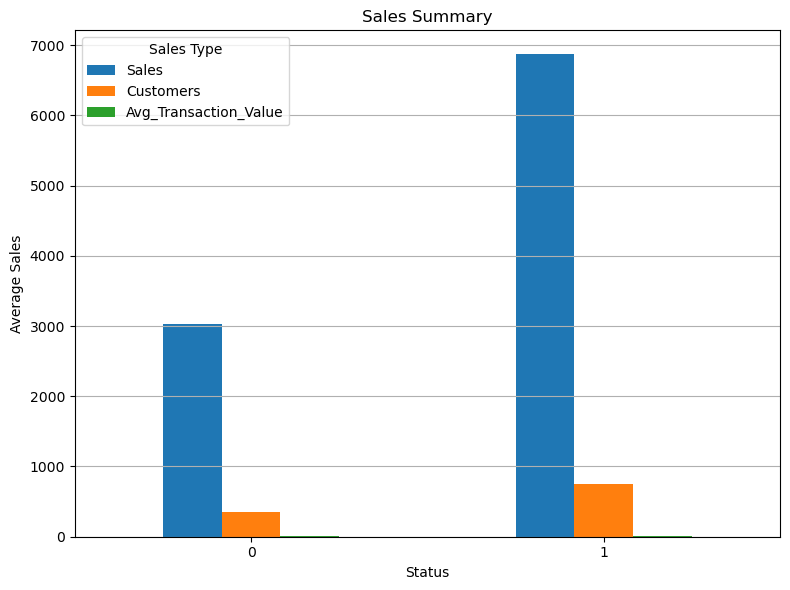

In [35]:
logger.info("Trends of Customer Behaviour during Store open and close Time")

# Create a 'DayOfWeek' column for further analysis if not present
merged_data['DayOfWeek'] = merged_data['Date'].dt.day_name()

# Create a new column for Open/Closed based on the day of the week
merged_data['Status'] = merged_data['DayOfWeek'].apply(lambda x : 'Open' if x in 
                                                ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'Closed')

# Aggregate sales based on the Status
sales_summary = merged_data.groupby('Status').agg({
    'Sales': 'mean',
    'Customers': 'mean'
}).reset_index()

# Calculate average transaction value for each category
sales_summary['Avg_Transaction_Value'] = sales_summary['Sales'] / sales_summary['Customers']

print(sales_summary)

#Plotting
sales_summary.plot(kind='bar', figsize=(8, 6))
plt.title('Sales Summary')
plt.xlabel('Status')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)  
plt.legend(title='Sales Type')
plt.tight_layout()
plt.grid(axis = 'y')
plt.show()

                                                                          

DayOfWeek
Friday       6723.274305
Monday       7809.044510
Saturday     5847.562599
Sunday        204.183189
Thursday     6247.575913
Tuesday      7005.244467
Wednesday    6555.884138
Name: Sales, dtype: float64


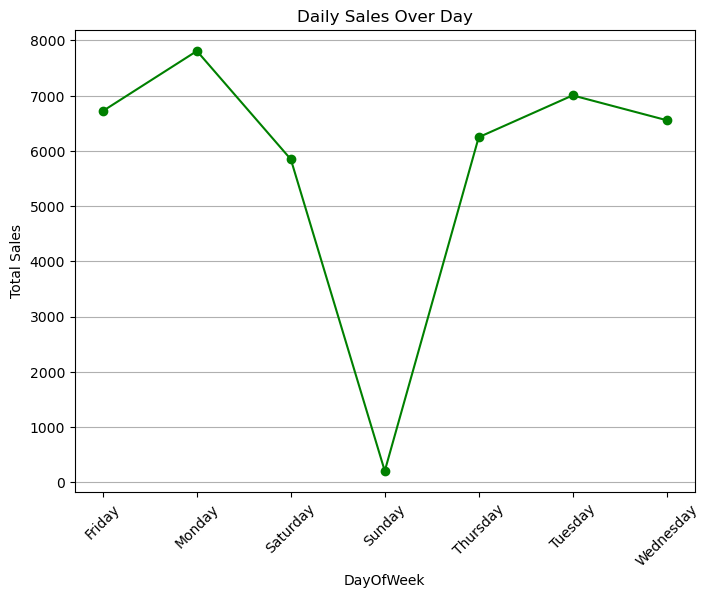

In [36]:
# Group by DayOfWeek and calculate total sales
weekly_sales_data = merged_data.groupby('DayOfWeek')['Sales'].mean()
print(weekly_sales_data)

# Plotting
plt.figure(figsize=(8,6))
weekly_sales_data.plot(kind = 'line', marker = 'o' , color = 'green')
plt.title("Daily Sales Over Day")
plt.xlabel('DayOfWeek')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

   DayOfWeek        Sales   Customers
0     Friday  6723.274305  743.150742
1     Monday  7809.044510  813.065791
2   Saturday  5847.562599  657.112237
3     Sunday   204.183189   35.786817
4   Thursday  6247.575913  697.541486
5    Tuesday  7005.244467  760.984615
6  Wednesday  6555.884138  721.639666


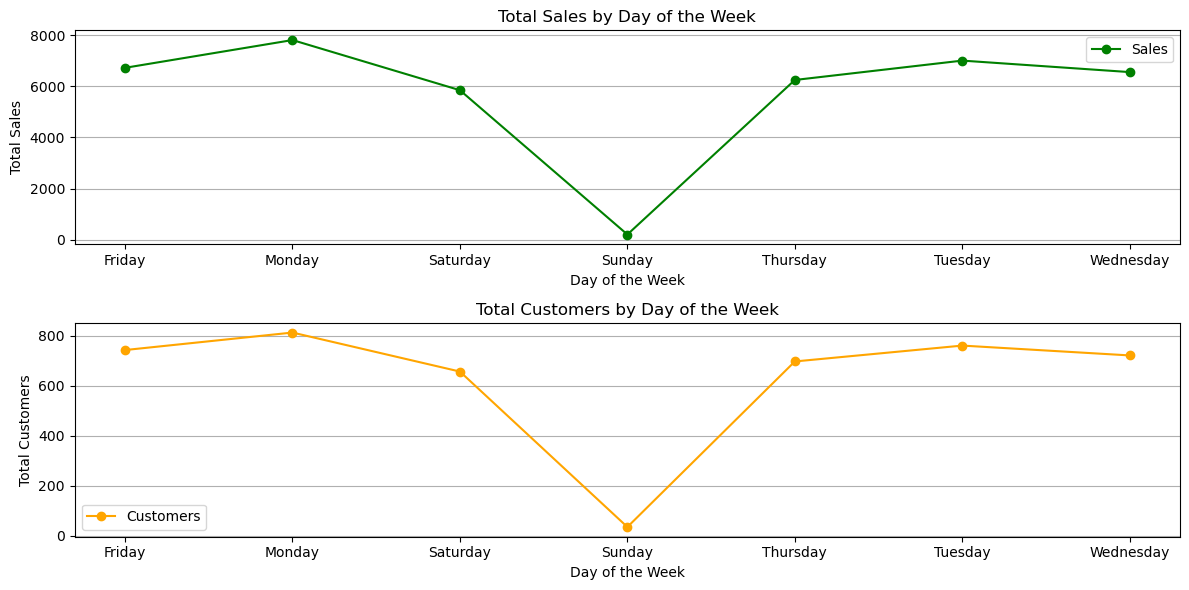

In [37]:
# Group by DayOfWeek and calculate total sales and customer counts
daily_sales = merged_data.groupby('DayOfWeek').agg({'Sales': 'mean', 'Customers': 'mean'}).reset_index()
print(daily_sales)

plt.figure(figsize=(12, 6))
# Plot Sales
plt.subplot(2, 1, 1)
plt.plot(daily_sales['DayOfWeek'], daily_sales['Sales'], marker='o', color='green', label='Sales')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(daily_sales['DayOfWeek'])
plt.grid(axis = 'y')
plt.legend()

# Plot Customers
plt.subplot(2, 1, 2)
plt.plot(daily_sales['DayOfWeek'], daily_sales['Customers'], marker='o', color='orange', label='Customers')
plt.title('Total Customers by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Customers')
plt.xticks(daily_sales['DayOfWeek'])
plt.grid(axis= 'y')
plt.legend()

plt.tight_layout()
plt.show()


**Analysis**
Sales are significantly higher when the store is open, which is expected since customers cannot make purchases when the store is closed.
The number of customers is also notably higher when the store is open. This suggests that having the store open is essential for attracting customers.
The average transaction value is higher when the store is open. This could imply that customers tend to purchase more or spend more per transaction when the store is operating.

**Top Sales Days**
Monday: Highest sales at $7,809.04 and 813.07 customers. This suggests that customers are likely starting their week with shopping.
Tuesday: Second highest sales at $7,005.24. This indicates sustained shopping behavior early in the week.

**Low Sales Day**
Sunday: Notably low sales at $204.18 with only 35.79 customers. This could suggest that Sundays are not popular shopping days

**Middle Sales Days**
Wednesday, Thursday, and Friday have moderate sales, indicating steady customer engagement during the week, but none reach the levels seen on Monday and Tuesday.

**Saturday Sales**
Saturday's sales are lower than Monday and Tuesday but higher than Sunday. This indicates that, although Saturday is part of the weekend, people are still engaging in shopping.


1.h--> Which stores are opened on all weekdays? How does that affect their sales on
weekends?

In [38]:
logger.info("Analyse stores are opened on all weekday and their affect on sales")
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekend = ['Saturday' , 'Sunday']
weekdays = merged_data[merged_data['DayOfWeek'].isin(weekday)]
weekends = merged_data[merged_data['DayOfWeek'].isin(weekend)]

# Group by Store  if they are open all weekdays and weekends
open_stores_weekdays =  weekdays.groupby('Store')['Open'].sum().reset_index()
open_stores_weekends = weekends.groupby('Store')['Open'].sum().reset_index()

print(open_stores_weekdays)
print((open_stores_weekends))

# Step 3: Identify stores that are open all weekdays / weekends
open_stores_weekdays['OpenAllWeekdays'] = open_stores_weekdays['Open'] >= 5
open_stores_weekends['OpenAllWeekends'] = open_stores_weekends['Open']>=2
stores_open_all_weekdays = open_stores_weekdays[open_stores_weekdays['OpenAllWeekdays']]
stores_open_all_weekends = open_stores_weekends[open_stores_weekends['OpenAllWeekends']]

# Analyze weekend sales for these stores
weekend_sales = weekends[weekends['Store'].isin(stores_open_all_weekdays['Store'])]
weekdays_sales = weekdays[weekdays['Store'].isin(stores_open_all_weekdays['Store'])]
#print(weekend_sales)
#print(weekdays_sales)

weekend_analysis = weekend_sales.groupby('Store').agg({'Sales': 'sum', 'Customers': 'sum'}).reset_index()
weekdays_analysis = weekdays_sales.groupby('Store').agg({'Sales' : 'sum' , 'Customers' : 'sum'}).reset_index()
#print("Stores Open All Weekdays:")
#print(stores_open_all_weekdays)
#print("Stores Open All Weekends:")
#print(stores_open_all_weekends)

#print("Weekends Sales Analysis for Open All Weekdays Stores:")
#print(weekend_analysis)
#print("Weekdays Sales Analysis for Open All Weekdays Stores: ")
#print(weekdays_analysis)




      Store  Open
0         1   647
1         2   650
2         3   646
3         4   650
4         5   645
...     ...   ...
1110   1111   646
1111   1112   646
1112   1113   650
1113   1114   650
1114   1115   647

[1115 rows x 2 columns]
      Store  Open
0         1   134
1         2   134
2         3   133
3         4   134
4         5   134
...     ...   ...
1110   1111   133
1111   1112   133
1112   1113   134
1113   1114   134
1114   1115   134

[1115 rows x 2 columns]


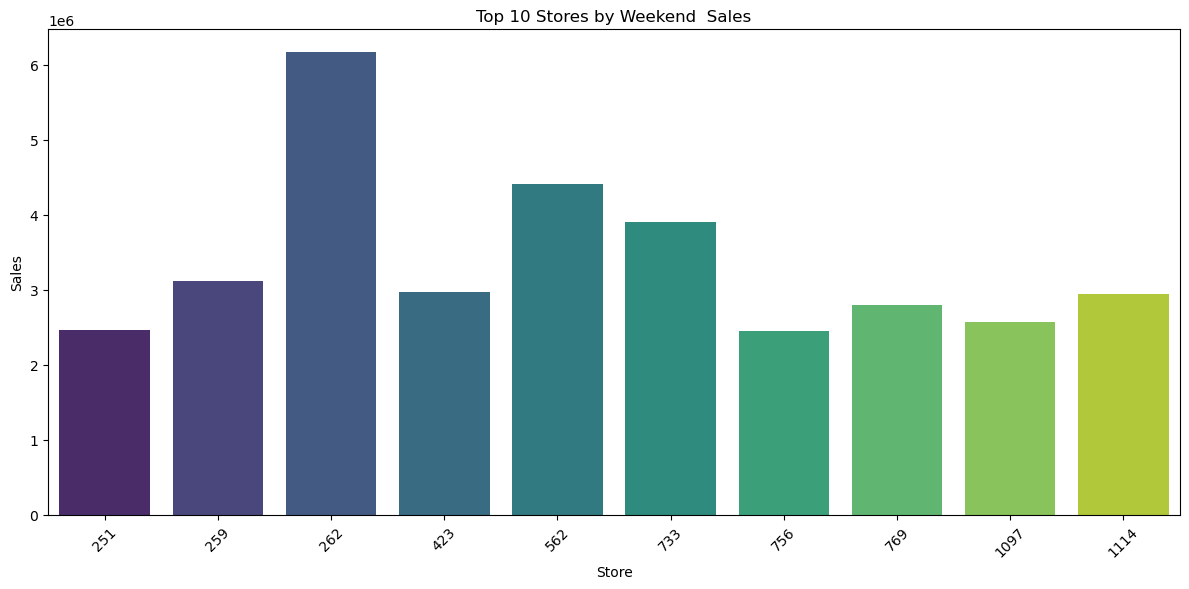

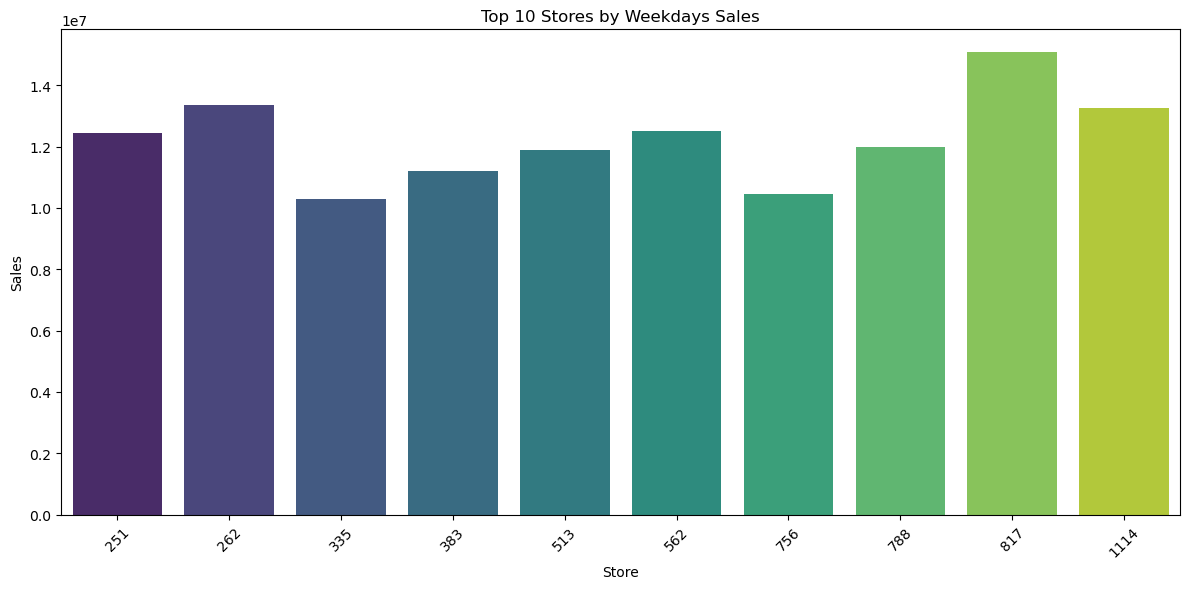

In [39]:
# Get the top 10 stores by Weekend Sales
top_n_weekend = weekend_analysis.nlargest(10, 'Sales')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_n_weekend, x='Store', y='Sales', palette='viridis')
plt.title('Top 10 Stores by Weekend  Sales')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Get the top 10 stores by Weekdays Sales
top_n_weekdays = weekdays_analysis.nlargest(10, 'Sales')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_n_weekdays, x='Store', y='Sales', palette='viridis')
plt.title('Top 10 Stores by Weekdays Sales')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Weekend Stores Analysis**
Store 262: With sales of 6,162,493 and 1,015,619 customers, this store is a clear leader in weekend sales.
The customer counts for the top weekend stores are quite high, especially for Store 262. This suggests strong customer loyalty or effective marketing strategies that attract shoppers on weekends.

**Weekday Stores Analysis**
Store 817: This store dominates weekday sales with an impressive 15,067,356 in sales, indicating that it likely serves a different customer demographic during weekdays compared to weekends.
Stores like 262 and 1114 appear in both lists, demonstrating their strong performance across different days. Their business strategies likely adapt well to both weekend and weekday shopping habits.

1.i--> Check how the assortment type affects sales

  Assortment  Total_Sales  Average_Sales  Store_Count
0          a   2945750070    5481.026096       537445
1          b     70946312    8553.931999         8294
2          c   2856484241    6058.676567       471470


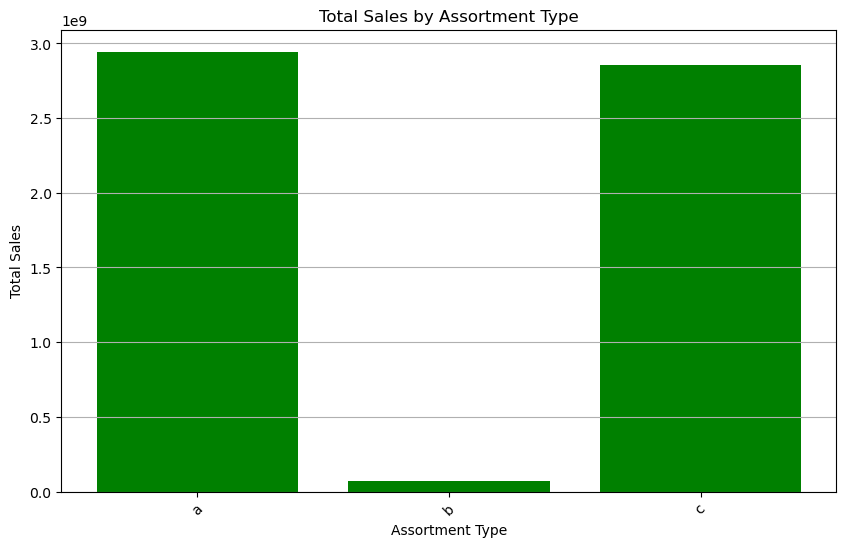

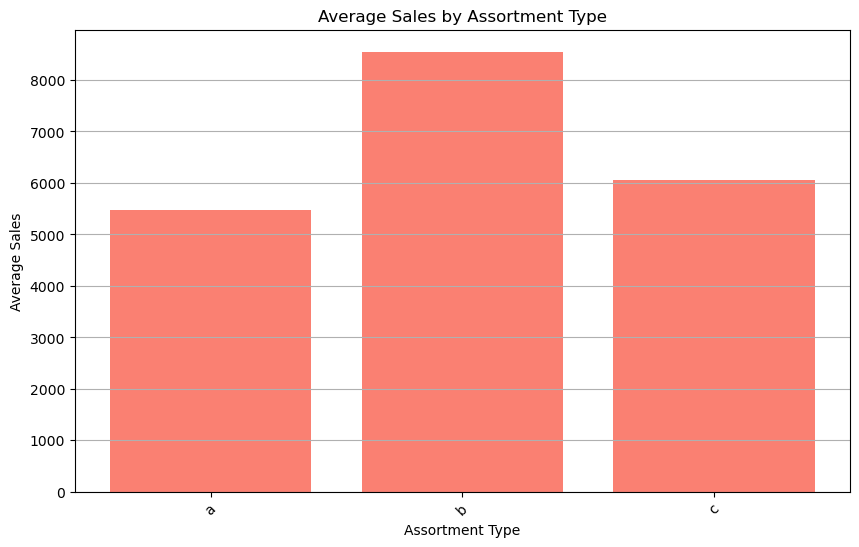

Text(0.5, 1.0, '% of Store Count according to Assortment Type')

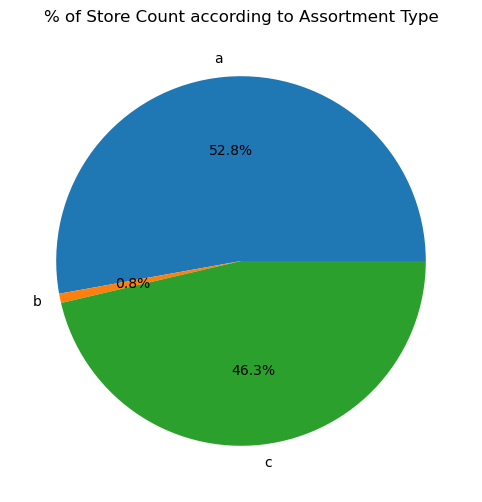

In [40]:
logger.info("Distribution of sales according to assortment type")

# Group by Assortment and calculate total and average sales
assortment_sales = merged_data.groupby('Assortment')['Sales'].agg(['sum', 'mean', 'count']).reset_index()
assortment_sales.columns = ['Assortment', 'Total_Sales', 'Average_Sales', 'Store_Count']

# Print the results
print(assortment_sales)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.bar(assortment_sales['Assortment'], assortment_sales['Total_Sales'], color='green')
plt.title('Total Sales by Assortment Type')
plt.xlabel('Assortment Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Compare average sales as well
plt.figure(figsize=(10, 6))
plt.bar(assortment_sales['Assortment'], assortment_sales['Average_Sales'], color='salmon')
plt.title('Average Sales by Assortment Type')
plt.xlabel('Assortment Type')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Compare Store Count
plt.figure(figsize = (8,6))
plt.pie(
    assortment_sales['Store_Count'],
    labels=assortment_sales['Assortment'],
    autopct='%1.1f%%'
    ) 
plt.title("% of Store Count according to Assortment Type")


**Total Sales Distribution:**
Assortment a and c dominate the total sales, combined total of approximately 5.8 billion, while assortment b contributes significantly less at about 70.9 million. This indicates that assortments a and c are likely more popular or have broader product offerings.

**Average Sales per Store:**
Assortment b has the highest average sales per store (8,553.93), suggesting that stores that carry assortment b may have higher sales efficiency or that the products in this assortment are priced higher or in demand.
Assortments a and c have lower average sales per store, at 5,481.03 and 6,058.68 respectively, indicating that while these assortments generate more total sales, they may have a larger number of stores contributing to that figure.

**Store Count Analysis:**
Assortment a has the highest store count (537,445), which correlates with its high total sales. This suggests a wide distribution or availability of this assortment type.
Assortment b has a significantly lower store count (8,294), which might indicate either a more specialized or premium product line that is not as widely distributed.

1.j-->How does the distance to the next competitor affect sales? What if the store and
its competitors all happen to be in city centres, does the distance matter in that
case?

Correlation between distance to competitor and sales: -0.01861153060827899


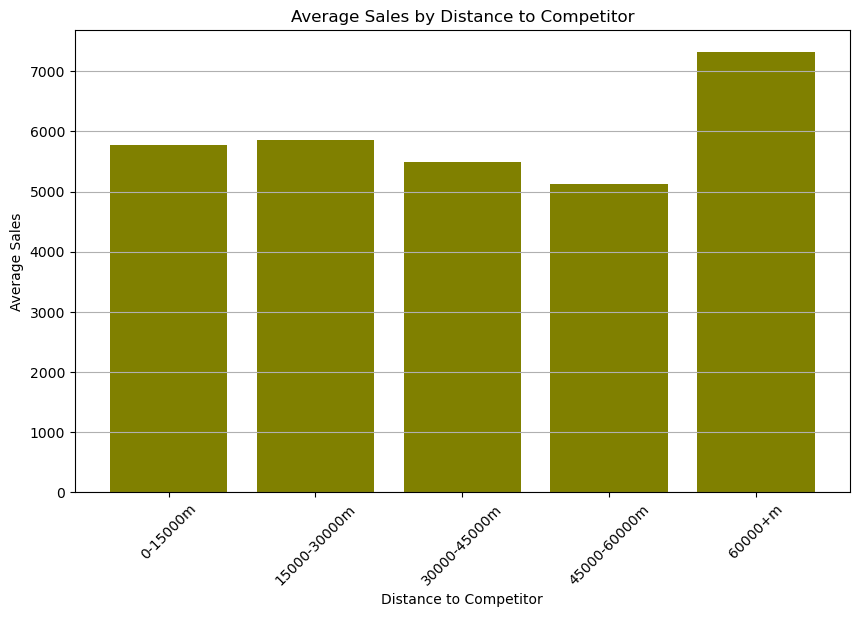

In [41]:
logger.info("Analyzing the impact of distance to the next competitor on sales")

# Calculate the correlation between the distance to the nearest competitor and sales.
correlation = merged_data['CompetitionDistance'].corr(merged_data['Sales'])
print("Correlation between distance to competitor and sales:", correlation)

#Group the data by distance ranges (e.g., 0-15000m, 15000-03000m, etc.) and calculate average sales for each range
merged_data['Distance_Range'] = pd.cut(merged_data['CompetitionDistance'], bins=[0, 15000, 30000, 45000, 60000, float('inf')], 
                              labels=['0-15000m', '15000-30000m', '30000-45000m', '45000-60000m', '60000+m'])
average_sales_by_distance = merged_data.groupby('Distance_Range')['Sales'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(average_sales_by_distance['Distance_Range'], average_sales_by_distance['Sales'], color='olive')
plt.title('Average Sales by Distance to Competitor')
plt.xlabel('Distance to Competitor')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.grid(axis = 'y')
plt.show()




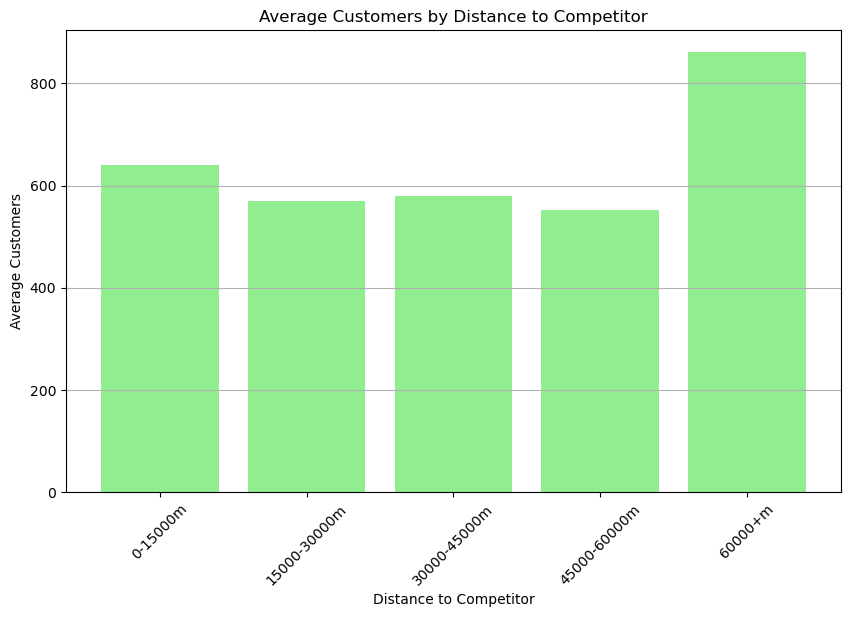

In [42]:
# Grouping by Distance_Range and calculating average customer counts
average_customers_by_distance = merged_data.groupby('Distance_Range')['Customers'].mean().reset_index()

# Plotting average customers by distance range
plt.figure(figsize=(10, 6))
plt.bar(average_customers_by_distance['Distance_Range'], average_customers_by_distance['Customers'], color='lightgreen')
plt.title('Average Customers by Distance to Competitor')
plt.xlabel('Distance to Competitor')
plt.ylabel('Average Customers')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


**Correlation Analysis:**
A negative correlation suggest that closer competitors may lead to higher sales.

**Sales Performance at Short Distances:**
The average sales for the closest distance range (0-15,000m) is 5,771.05. This indicates that stores located near competitors are performing reasonably well.

**Sales Decline in Mid Ranges:**
There is a slight decline in average sales as the distance increases from 15,000m to 45,000m. Sales drop from 5,851.03 to 5,486.52. This may suggest that competition is impacting sales negatively at these ranges.

**Lowest Sales at Further Distances:**
The average sales at the 45,000-60,000m range is the lowest at 5,131.03. This could indicate that stores at this distance are losing customer interest or are less competitive.

**Highest Sales Beyond 60,000m:**
Interestingly, the average sales for the distance range beyond 60,000m is 7,321.47, the highest among all ranges. This suggests that stores far away from competitors may serve a more distinct market, or they might be perceived as destinations, which could enhance their sales.

**Highest Customer Count at Short Distances:**
The closest distance range (0-15,000m) has the highest average customer count (640.52). This suggests that stores near competitors benefit from shared foot traffic, typical in urban environments.

**Decline in Mid-Range Distances:**
Customer counts decrease in the 15,000-45,000m ranges, with the lowest average at 45,000-60,000m (552.55). This may indicate that stores at these distances are less attractive or accessible to customers, potentially losing them to closer alternatives.

**Significant Spike Beyond 60,000m:**
Interestingly, the customer count for the distance range over 60,000m is the highest at 861.18. This could imply that stores at this distance may cater to a more dedicated customer base, possibly acting as destinations for shoppers willing to travel further

1.k--> How does the opening or reopening of new competitors affect stores? Check for
stores with NA as competitor distance but later on has values for competitor
distance

In [43]:
zero_distance_stores = merged_data[merged_data['CompetitionDistance'] <= 0]
print(zero_distance_stores.shape)  # Check how many stores have zero or negative distances



(0, 24)


**Task 2 - Prediction of store sales**

In [44]:
logger.info("Preporcessing is started for building our models")

# Create a column indicating whether the day is a weekend or a weekday:
merged_data['IsWeekend'] = merged_data.DayOfWeek.isin(['Saturday','Sunday']) # Saturday and Sunday


In [45]:
# Extract holiday dates from  dataset
state_holiday_dates = merged_data.loc[merged_data['StateHoliday'].isin(['a', 'b', 'c']), 'Date']
school_holiday_dates = merged_data.loc[merged_data['SchoolHoliday'] == 1, 'Date']

# Combine the lists of holiday dates and remove duplicates
holidays = pd.concat([state_holiday_dates, school_holiday_dates]).drop_duplicates().sort_values()

# Ensure the combined holidays are in datetime format
holidays = pd.to_datetime(holidays)

# Create a function to find the next holiday for each date in a vectorized way 
logger.info("Number of days to holidays")
def calculate_days_to_next_holiday(dates):
    # Create an array to hold results
    days_to_holiday = []
    
    # Iterate over each date
    for date in dates:
        next_holiday = holidays[holidays > date]
        if not next_holiday.empty:
            days_to_holiday.append((next_holiday.iloc[0] - date).days)
        else:
            days_to_holiday.append(None)  # No future holiday
        
    return days_to_holiday

# Calculate DaysToHoliday for the entire column
merged_data['DaysToHoliday'] = calculate_days_to_next_holiday(merged_data['Date'])


In [46]:
# Create a function to calculate the number of days after the last holiday for each date:
logger.info("Number of days after holidays")
def calculate_days_after_holiday(dates):
    days_after_holiday = []
    
    # Iterate over each date
    for date in dates:
        previous_holiday = holidays[holidays < date]
        if not previous_holiday.empty:
            days_after_holiday.append((date - previous_holiday.iloc[-1]).days)
        else:
            days_after_holiday.append(None)  # No previous holiday
        
    return days_after_holiday

# Calculate DaysAfterHoliday for the entire column
merged_data['DaysAfterHoliday'] = calculate_days_after_holiday(merged_data['Date'])


In [47]:
# Beginning of month, mid month and ending of month
logger.info('Beginning of month, mid month and ending of month')
merged_data['beginning_of_month'] = merged_data['Date'].dt.to_period('M').dt.start_time
merged_data['mid_month'] = merged_data['Date'].dt.to_period('M').dt.start_time + pd.offsets.Day(14)
merged_data['ending_of_month'] = merged_data['Date'].dt.to_period('M').dt.end_time


In [48]:
# Creating a new column sales per customer
merged_data['SalesPerCustomer'] = merged_data['Sales']/merged_data['Customers']

# Sales Category
bins = [-1, 5000, 10000, 20000, float('inf')]
labels = ['Low', 'Medium', 'High', 'Very High']
merged_data['SalesCategory'] = pd.cut(merged_data['Sales'] , bins= bins , labels= labels , right = True)

Text(0.5, 1.0, 'Sales Category Distribution')

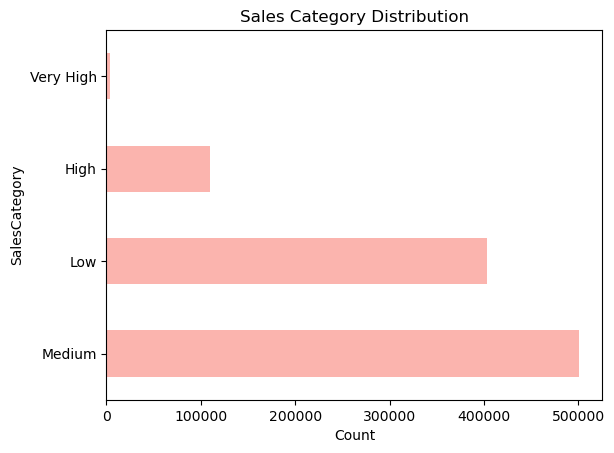

In [49]:
merged_data['SalesCategory'].value_counts().plot(kind = 'barh' , colormap= 'Pastel1')
plt.xlabel('Count')
plt.title('Sales Category Distribution')

**Medium (500,465):**
This category has the highest count of sales transactions.
It suggests that a significant number of sales fall within the range defined for "Medium" (5,001 to 10,000).
This could indicate a strong base of customers making moderate purchases, which might reflect effective pricing, product offering, or customer engagement.

**Low (403,111):**
This could mean that many customers are either making very small purchases or that there are a lot of sales transactions at the lower end of your price range.

**High (109,534):**
This category shows fewer transactions compared to the Medium and Low categories, suggesting that fewer sales fall within the 10,001 to 20,000 range.This might indicate that while there are some high-value transactions, they are less common.

**Very High (4,099):**
The smallest count, indicating that very few transactions exceed 20,000.


In [50]:
# Extracting Month and Day from Date column
merged_data['Month'] = merged_data['Date'].dt.month
merged_data['Day'] = merged_data['Date'].dt.day

In [51]:
# Filling missing values 
merged_data['SalesPerCustomer'] = merged_data['SalesPerCustomer'].fillna(0)
merged_data.isnull().sum()

Store                           0
DayOfWeek                       0
Date                            0
Sales                           0
Customers                       0
Open                            0
Promo                           0
StateHoliday                    0
SchoolHoliday                   0
StoreType                       0
Assortment                      0
CompetitionDistance             0
CompetitionOpenSinceMonth       0
CompetitionOpenSinceYear        0
Promo2                          0
Promo2SinceWeek                 0
Promo2SinceYear                 0
PromoInterval                   0
StateHoliday_Period             0
SchoolHoliday_Period            0
Year                            0
YearMonth                       0
Status                          0
Distance_Range                  0
IsWeekend                       0
DaysToHoliday                1115
DaysAfterHoliday             1114
beginning_of_month              0
mid_month                       0
ending_of_mont

In [52]:
# Final data for Model creation
logger.info("Final Data Preparation")

final_data = merged_data.drop(['Date' , 'YearMonth' , 'SchoolHoliday_Period' ] , axis=1)
print(final_data.head())


   Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
0      1     Friday   5263        555     1      1            0   
1      1   Thursday   5020        546     1      1            0   
2      1  Wednesday   4782        523     1      1            0   
3      1    Tuesday   5011        560     1      1            0   
4      1     Monday   6102        612     1      1            0   

   SchoolHoliday StoreType Assortment  ...  IsWeekend  DaysToHoliday  \
0              1         c          a  ...      False            NaN   
1              1         c          a  ...      False            1.0   
2              1         c          a  ...      False            1.0   
3              1         c          a  ...      False            1.0   
4              1         c          a  ...      False            1.0   

   DaysAfterHoliday  beginning_of_month  mid_month  \
0               1.0          2015-07-01 2015-07-15   
1               1.0          2015-07-01 2015-07-15   
2 

In [53]:
final_data['DayOfWeek'] = final_data['DayOfWeek'].map({'Monday': 0,'Tuesday': 1,'Wednesday': 2,'Thursday': 3,'Friday': 4,'Saturday': 5,'Sunday': 6})
final_data['CompetitionOpenSinceMonth']=final_data['CompetitionOpenSinceMonth'].astype('Int16')
final_data['CompetitionOpenSinceYear'] = final_data['CompetitionOpenSinceYear'].astype('Int16')
final_data['Promo2SinceWeek'] = final_data['Promo2SinceWeek'].astype('Int16')
final_data['Promo2SinceYear'] = final_data['Promo2SinceYear'].astype('Int16')
final_data['StateHoliday_Period'] = final_data['StateHoliday_Period'].astype('category')
final_data['Status'] = final_data['Status'].map({'Open' : 1 , 'Closed'  : 0})

print(final_data.head())

   Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
0      1          4   5263        555     1      1            0   
1      1          3   5020        546     1      1            0   
2      1          2   4782        523     1      1            0   
3      1          1   5011        560     1      1            0   
4      1          0   6102        612     1      1            0   

   SchoolHoliday StoreType Assortment  ...  IsWeekend  DaysToHoliday  \
0              1         c          a  ...      False            NaN   
1              1         c          a  ...      False            1.0   
2              1         c          a  ...      False            1.0   
3              1         c          a  ...      False            1.0   
4              1         c          a  ...      False            1.0   

   DaysAfterHoliday  beginning_of_month  mid_month  \
0               1.0          2015-07-01 2015-07-15   
1               1.0          2015-07-01 2015-07-15   
2 

In [54]:
final_data.dtypes

Store                                 int64
DayOfWeek                             int64
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                       category
SchoolHoliday                         int64
StoreType                          category
Assortment                         category
CompetitionDistance                 float64
CompetitionOpenSinceMonth             Int16
CompetitionOpenSinceYear              Int16
Promo2                                int64
Promo2SinceWeek                       Int16
Promo2SinceYear                       Int16
PromoInterval                      category
StateHoliday_Period                category
Year                                  int32
Status                                int64
Distance_Range                     category
IsWeekend                              bool
DaysToHoliday                   

In [55]:
final_data.shape

(1017209, 31)

In [56]:
# Split the PromoInterval into separate binary columns for each month
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
for month in months:
    final_data[f'Promo_{month}'] = final_data['PromoInterval'].apply(lambda x: 1 if month in x else 0)



In [57]:
final_data.drop(columns = ['PromoInterval'])

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo_Mar,Promo_Apr,Promo_May,Promo_Jun,Promo_Jul,Promo_Aug,Promo_Sept,Promo_Oct,Promo_Nov,Promo_Dec
0,1,4,5263,555,1,1,0,1,c,a,...,0,1,0,0,1,0,0,1,0,0
1,1,3,5020,546,1,1,0,1,c,a,...,0,1,0,0,1,0,0,1,0,0
2,1,2,4782,523,1,1,0,1,c,a,...,0,1,0,0,1,0,0,1,0,0
3,1,1,5011,560,1,1,0,1,c,a,...,0,1,0,0,1,0,0,1,0,0
4,1,0,6102,612,1,1,0,1,c,a,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,5,4771,339,1,0,0,1,d,c,...,1,0,0,1,0,0,1,0,0,1
1017205,1115,4,4540,326,1,0,0,1,d,c,...,1,0,0,1,0,0,1,0,0,1
1017206,1115,3,4297,300,1,0,0,1,d,c,...,1,0,0,1,0,0,1,0,0,1
1017207,1115,2,3697,305,1,0,0,1,d,c,...,1,0,0,1,0,0,1,0,0,1


In [58]:
# OneHot Encoding
final_data = pd.get_dummies(final_data , columns= ['StoreType', 'Assortment', 'StateHoliday','StateHoliday_Period', 'SalesCategory'],
                            drop_first= True , prefix=['StoreType', 'Assortment', 'StateHoliday','StateHoliday_Period', 'SalesCategory'])
final_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,Assortment_c,StateHoliday_a,StateHoliday_b,StateHoliday_c,StateHoliday_Period_Before,StateHoliday_Period_During,StateHoliday_Period_Neither,SalesCategory_Medium,SalesCategory_High,SalesCategory_Very High
0,1,4,5263,555,1,1,1,1270.0,9,2008,...,False,False,False,False,False,False,True,True,False,False
1,1,3,5020,546,1,1,1,1270.0,9,2008,...,False,False,False,False,False,False,True,True,False,False
2,1,2,4782,523,1,1,1,1270.0,9,2008,...,False,False,False,False,False,False,True,False,False,False
3,1,1,5011,560,1,1,1,1270.0,9,2008,...,False,False,False,False,False,False,True,True,False,False
4,1,0,6102,612,1,1,1,1270.0,9,2008,...,False,False,False,False,False,False,True,True,False,False


In [59]:
final_data.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Status', 'Distance_Range',
       'IsWeekend', 'DaysToHoliday', 'DaysAfterHoliday', 'beginning_of_month',
       'mid_month', 'ending_of_month', 'SalesPerCustomer', 'Month', 'Day',
       'Promo_Jan', 'Promo_Feb', 'Promo_Mar', 'Promo_Apr', 'Promo_May',
       'Promo_Jun', 'Promo_Jul', 'Promo_Aug', 'Promo_Sept', 'Promo_Oct',
       'Promo_Nov', 'Promo_Dec', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_b', 'Assortment_c', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'StateHoliday_Period_Before',
       'StateHoliday_Period_During', 'StateHoliday_Period_Neither',
       'SalesCategory_Medium', 'SalesCategory_High',
       'SalesCategory_Very High'],
      dtype='object')

In [60]:
final_data = final_data.drop(columns = ['beginning_of_month' ,'PromoInterval' , 'mid_month', 'ending_of_month','Distance_Range']
                             , axis = 1)
final_data.shape


(1017209, 47)

In [61]:
for col in final_data.columns:
    if final_data[col].dtype in ['int64', 'int32', 'Int16', 'Int64' ,'float']:  
        final_data[col] = final_data[col].fillna(final_data[col].mean())

In [62]:
final_data.isnull().sum()

Store                          0
DayOfWeek                      0
Sales                          0
Customers                      0
Open                           0
Promo                          0
SchoolHoliday                  0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
Year                           0
Status                         0
IsWeekend                      0
DaysToHoliday                  0
DaysAfterHoliday               0
SalesPerCustomer               0
Month                          0
Day                            0
Promo_Jan                      0
Promo_Feb                      0
Promo_Mar                      0
Promo_Apr                      0
Promo_May                      0
Promo_Jun                      0
Promo_Jul                      0
Promo_Aug                      0
Promo_Sept                     0
Promo_Oct 

In [63]:
from sklearn.model_selection import train_test_split
X = final_data.drop(columns=['Sales'])
y = final_data['Sales']
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size= 0.2)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

# Standardized Data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
model_list = [LinearRegression() , DecisionTreeRegressor() ]

In [ ]:
logger.info('Model Building')
from sklearn.metrics import r2_score , mean_absolute_error

r2_score_list_train = []
r2_score_list_test = []

mae_list_train = []
mae_list_test = []

for model in model_list:
    print(f"*"*50)
    print(f"Starting Training Job for {model}")

    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)

    y_inference  = model.predict(X_test)

    r2_score_list_train.append(r2_score(y_train, y_train_pred))
    r2_score_list_test.append(r2_score(y_test, y_inference))

    mae_list_train.append(mean_absolute_error(y_train , y_train_pred))
    mae_list_test.append(mean_absolute_error(y_test , y_inference))

    print(f"Training and Prediction Successful for {model}")

    print(f"*"*50)


**************************************************
Starting Training Job for LinearRegression()
Training and Prediction Successful for LinearRegression()
**************************************************
**************************************************
Starting Training Job for DecisionTreeRegressor()
Training and Prediction Successful for DecisionTreeRegressor()
**************************************************


In [66]:
results_dataframe =pd.DataFrame({"models":model_list,
                                 "R2_Score for training" : r2_score_list_train,
                                 "R2_Score for test" : r2_score_list_test,
                                 "MAE for training" : mae_list_train,
                                 "MAE for testing" : mae_list_test

                                 })

In [67]:
print(results_dataframe)

                    models  R2_Score for training  R2_Score for test  \
0       LinearRegression()               0.974433           0.974561   
1  DecisionTreeRegressor()               1.000000           0.999822   

   MAE for training  MAE for testing  
0        374.746871       375.713226  
1          0.000000        13.369825  


**Evaluation**
R2 Score: R2 score indicates how well the model explains the variability of the target variable. A score of 1 indicates perfect prediction. The Decision Tree Regressor has a perfect training score and a very high testing score, while the Linear Regression model has slightly lower scores but still performs very well.

MAE (Mean Absolute Error): MAE measures the average magnitude of errors in predictions, with lower values indicating better performance. The Decision Tree Regressor has a MAE of 0 for the training set, which suggests it fits the training data perfectly, but its MAE on the testing set is 13.25, indicating some error in predictions. The Linear Regression model has a higher MAE, but it is relatively consistent between training and testing.

Conclusion
Overfitting Concern: The Decision Tree Regressor shows a perfect fit on the training data but has a noticeable error on the testing data. This suggests that it may be overfitting, capturing noise rather than the underlying pattern.

Better Generalization: The Linear Regression model, while it doesn't fit the training data as perfectly, demonstrates better generalization with similar R2  scores and lower variability in MAE.

**2.3 Choose a loss function**
MAE treats all errors equally, making it robust to outliers. MAE is particularly beneficial in scenarios where we want a straightforward measure of average error and when our data may contain outliers or we want to avoid over-penalizing larger errors.

**2.4 Post Prediction analysis**
Explore the feature importance from our modelling.

In [68]:
feature_names = X.columns
for model in model_list:
    model.fit(X_train, y_train)
    if isinstance(model, LinearRegression):
        importances = model.coef_
        importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    elif isinstance(model, DecisionTreeRegressor):
        importances = model.feature_importances_
        importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

    importance_df = importance_df.sort_values(by='Importance', ascending=False)

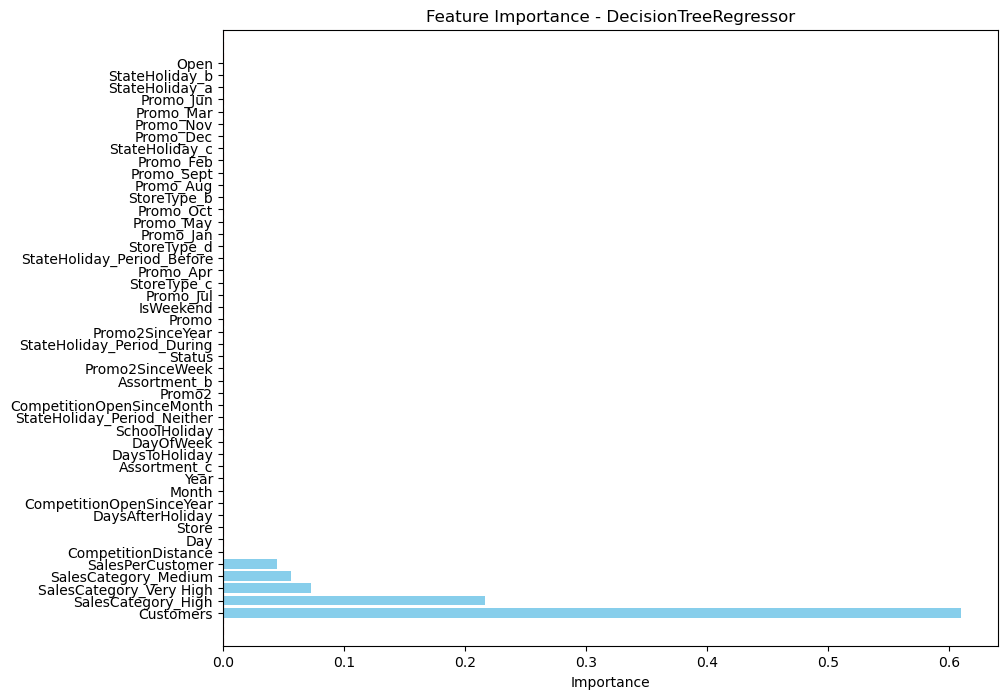

In [69]:
# Plotting feature importance
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title(f'Feature Importance - {model.__class__.__name__}')
plt.axvline(x=0, color='red', linestyle='--')  
plt.show()

**Overview** :

"In our graph, 'Customers' is identified as the most important feature, followed by the 'Sales Category' feature. The 'Sales per Customer' feature is also significant, while the remaining features have much lower importance or are nearly negligible."


**Taking only important feature from DataSet and Train our model**

In [70]:
final_data.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Year', 'Status', 'IsWeekend', 'DaysToHoliday',
       'DaysAfterHoliday', 'SalesPerCustomer', 'Month', 'Day', 'Promo_Jan',
       'Promo_Feb', 'Promo_Mar', 'Promo_Apr', 'Promo_May', 'Promo_Jun',
       'Promo_Jul', 'Promo_Aug', 'Promo_Sept', 'Promo_Oct', 'Promo_Nov',
       'Promo_Dec', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_b', 'Assortment_c', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'StateHoliday_Period_Before',
       'StateHoliday_Period_During', 'StateHoliday_Period_Neither',
       'SalesCategory_Medium', 'SalesCategory_High',
       'SalesCategory_Very High'],
      dtype='object')

In [77]:
X  =  final_data[['Customers' , 'SalesCategory_High' , 'SalesCategory_Very High' ,
                'SalesCategory_Medium' , 'SalesPerCustomer']]
print(X.shape)
y = final_data['Sales']
print(y.shape)

(1017209, 5)
(1017209,)


In [78]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train , y_test = train_test_split(X,y , test_size= 0.2)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

# Standardized Data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [79]:
logger.info('Model list is ready')
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
model_list = [LinearRegression() , DecisionTreeRegressor() ]

In [80]:
logger.info('Model is building using only important feature')
from sklearn.metrics import r2_score , mean_absolute_error

r2_score_list_train = []
r2_score_list_test = []

mae_list_train = []
mae_list_test = []

for model in model_list:
    print(f"*"*50)
    print(f"Starting Training Job for {model}")

    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)

    y_inference  = model.predict(X_test)

    r2_score_list_train.append(r2_score(y_train, y_train_pred))
    r2_score_list_test.append(r2_score(y_test, y_inference))

    mae_list_train.append(mean_absolute_error(y_train , y_train_pred))
    mae_list_test.append(mean_absolute_error(y_test , y_inference))

    print(f"Training and Prediction Successful for {model}")

    print(f"*"*50)

**************************************************
Starting Training Job for LinearRegression()
Training and Prediction Successful for LinearRegression()
**************************************************
**************************************************
Starting Training Job for DecisionTreeRegressor()
Training and Prediction Successful for DecisionTreeRegressor()
**************************************************


In [81]:
results_dataframe =pd.DataFrame({"models":model_list,
                                 "R2_Score for training" : r2_score_list_train,
                                 "R2_Score for test" : r2_score_list_test,
                                 "MAE for training" : mae_list_train,
                                 "MAE for testing" : mae_list_test

                                 })

print(results_dataframe)

                    models  R2_Score for training  R2_Score for test  \
0       LinearRegression()               0.954105           0.954196   
1  DecisionTreeRegressor()               1.000000           0.999913   

   MAE for training  MAE for testing  
0        584.981957       585.969510  
1          0.000000         8.190875  


**Analysis**
By using only important feature we almost got the same accuracy but error is little bit ups . So instead of using 51 feature we
can use 5 feature and with this we reduce training time and our model became more fast with almost same accuracy.

**2.5 Serialize models**

In [82]:
logger.info('Saving our final model')
linear_model = model_list[0]

from joblib import load
from joblib import dump

# Save the Linear Regression model
dump(linear_model, 'linear_regression_model.joblib')

# Load the Linear Regression model
linear_model_loaded = load('linear_regression_model.joblib')

In [83]:
from joblib import dump
from datetime import datetime

# Assume you have already trained the Linear Regression model
linear_model = model_list[0]

# Get the current timestamp
timestamp = datetime.now().strftime("%d-%m-%Y-%H-%M-%S-%f")

# Create a filename with the timestamp
linear_filename = f"linear_regression_model_{timestamp}.pkl"

# Save the Linear Regression model
dump(linear_model, linear_filename)

print(f"Model saved as: {linear_filename}")

from joblib import load

# Load the model using the generated filename
linear_model_datetime_loaded = load(linear_filename)

Model saved as: linear_regression_model_04-11-2024-14-17-36-481260.pkl
